 # Heart Attack Risk Prediction

## Introduction
This notebook aims to predict whether an individual is at high risk of a heart attack based on specific health features. We use **HighRiskLastYear** as our target variable and analyze its relationships with various other features through exploratory data analysis (EDA) and statistical tests. Additionally, we compare the performance of different tree-based models to identify the most accurate approach for predicting heart attack risk.

## Objectives
1. **EDA and Statistical Analysis**: Examine patterns and relationships between features and the target variable.
2. **Model Comparison**: Evaluate various tree-based algorithms to find the optimal model for predicting high heart attack risk.

This step-by-step analysis will guide us in uncovering key insights about heart attack risk factors and in developing a reliable prediction model.


# Basic Import

In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/kaggle/input/patients-data-for-medical-field/Patients Data ( Used for Heart Disease Prediction ).xlsx")

# EDA 

In [3]:
num_col = data.select_dtypes(include=['float64', 'int64']).columns
cat_col = data.select_dtypes(include=['object']).columns

In [4]:
def prop_plot(df,cols):
    
    for col in cols:
    
        counts = df[col].value_counts()

        plt.figure(figsize=(8, 6))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Proportion of {col} in Dataset")
        plt.show()

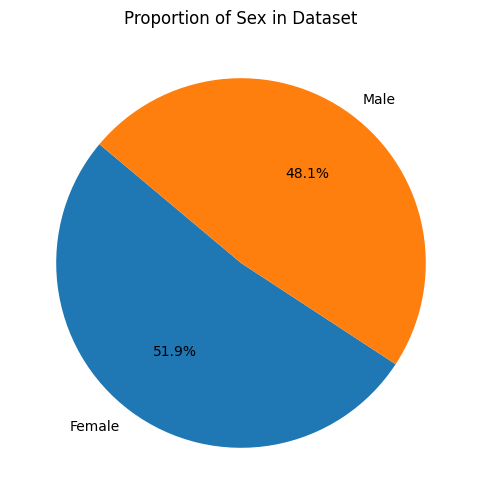

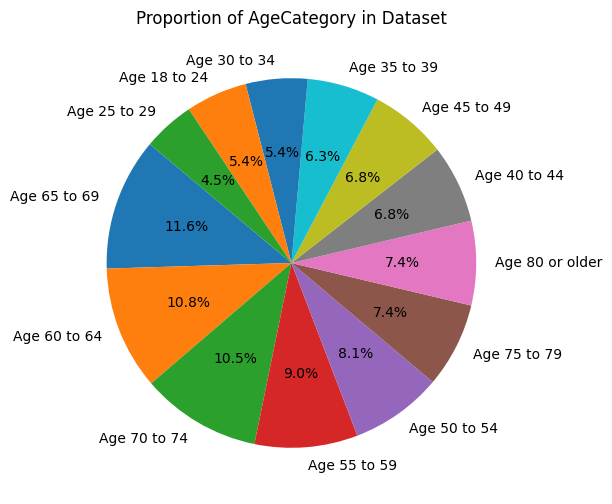

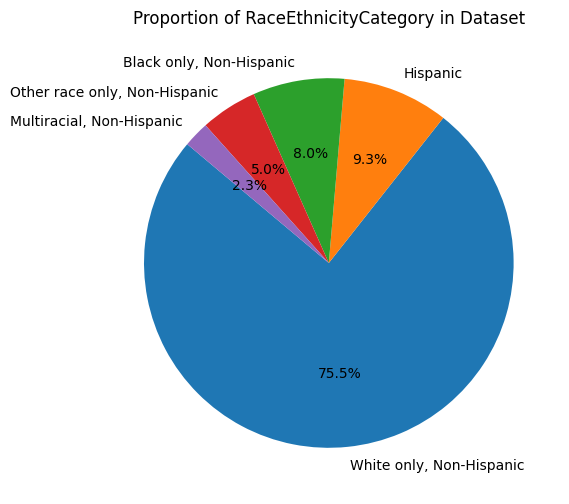

In [5]:
# Basic check for population separation
cols = ['Sex','AgeCategory','RaceEthnicityCategory']
prop_plot(data,cols)

The distribution shows a notable imbalance, with a higher representation of individuals identifying as White. To assess potential bias, let’s examine the distribution between White and non-White groups in more detail.


In [6]:
data_w = data[data['RaceEthnicityCategory'] == 'White only, Non-Hispanic'].reset_index(drop = True)
data_nw = data[data['RaceEthnicityCategory'] != 'White only, Non-Hispanic'].reset_index(drop = True)

In [11]:
def prop_plot_compare(df0,df1, df2, cols):
    for col in cols:
        if col == 'RaceEthnicityCategory':
            pass
        else:
            counts_0 = df0[0][col].value_counts()
            counts_1 = df1[0][col].value_counts()
            counts_2 = df2[0][col].value_counts()

            fig, axes = plt.subplots(1, 3, figsize=(20, 10))

            axes[0].pie(counts_0, labels=counts_0.index, autopct='%1.1f%%', startangle=140)
            axes[0].set_title(f"Proportion of {col} in {df0[1]}")

            axes[1].pie(counts_1, labels=counts_1.index, autopct='%1.1f%%', startangle=140)
            axes[1].set_title(f"Proportion of {col} in {df1[1]}")

            axes[2].pie(counts_2, labels=counts_2.index, autopct='%1.1f%%', startangle=140)
            axes[2].set_title(f"Proportion of {col} in {df2[1]}")

            plt.suptitle(f"Comparison of {col} Proportions in Both Datasets")
            plt.show()

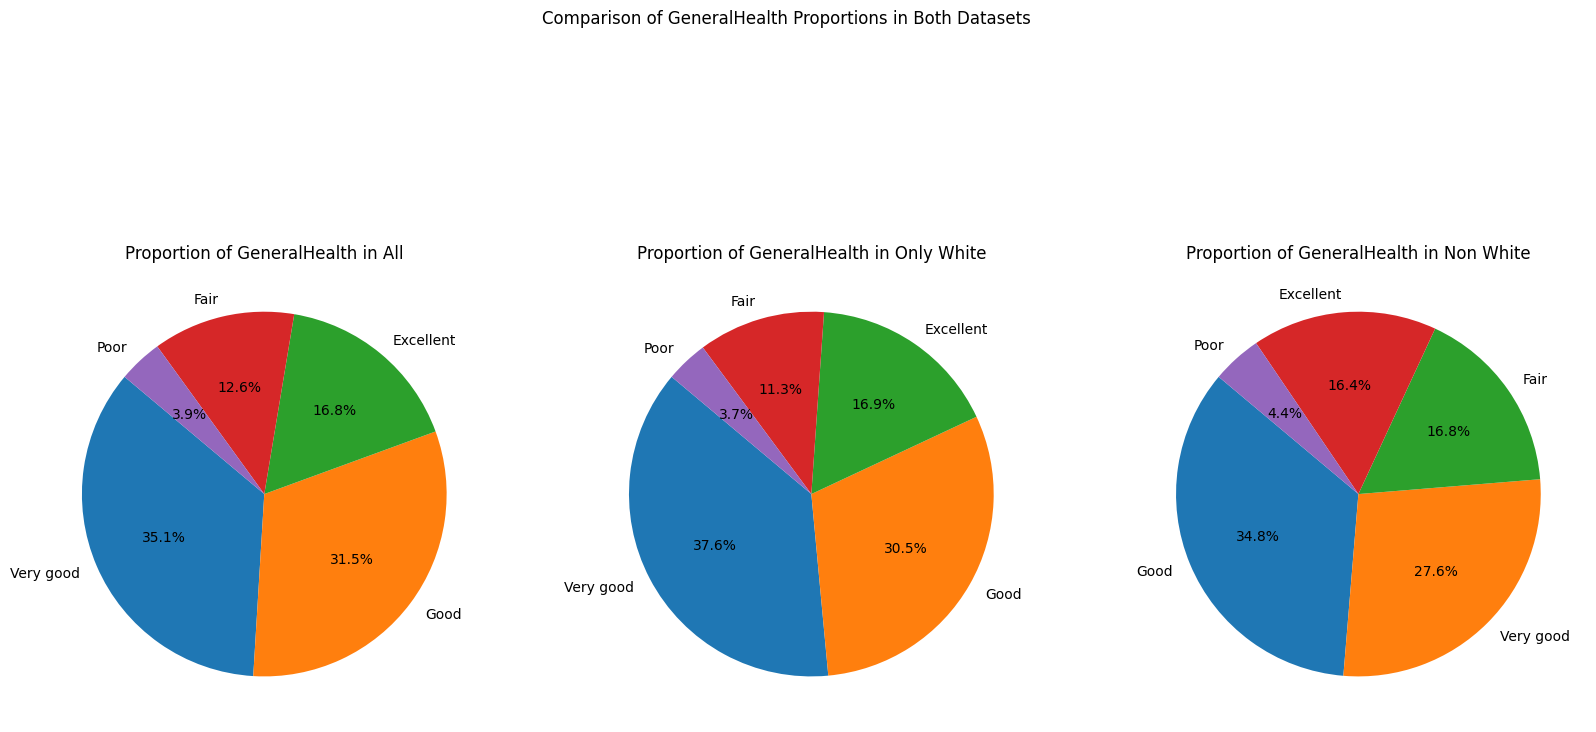

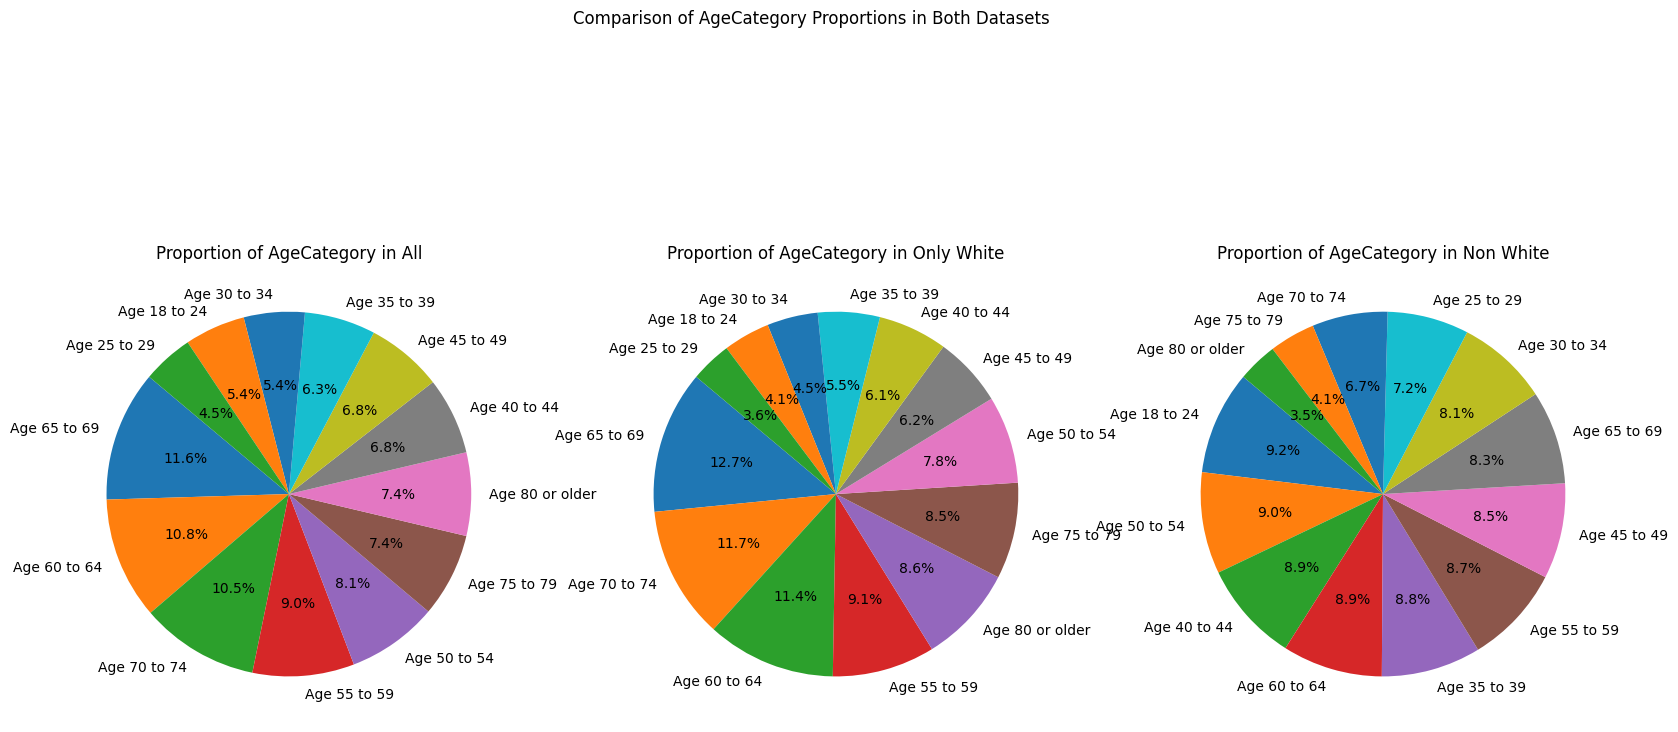

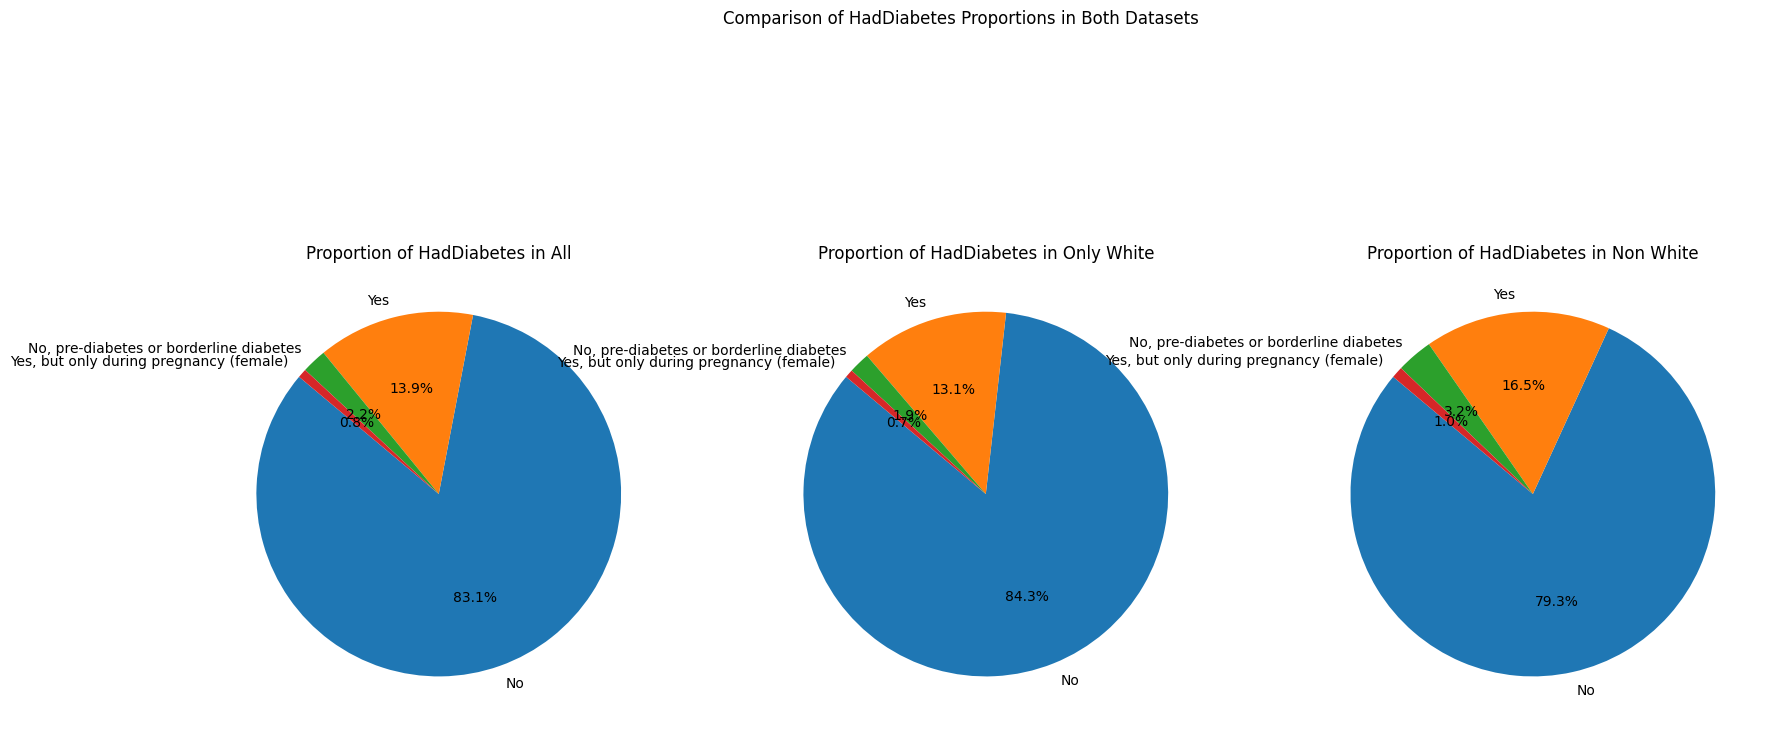

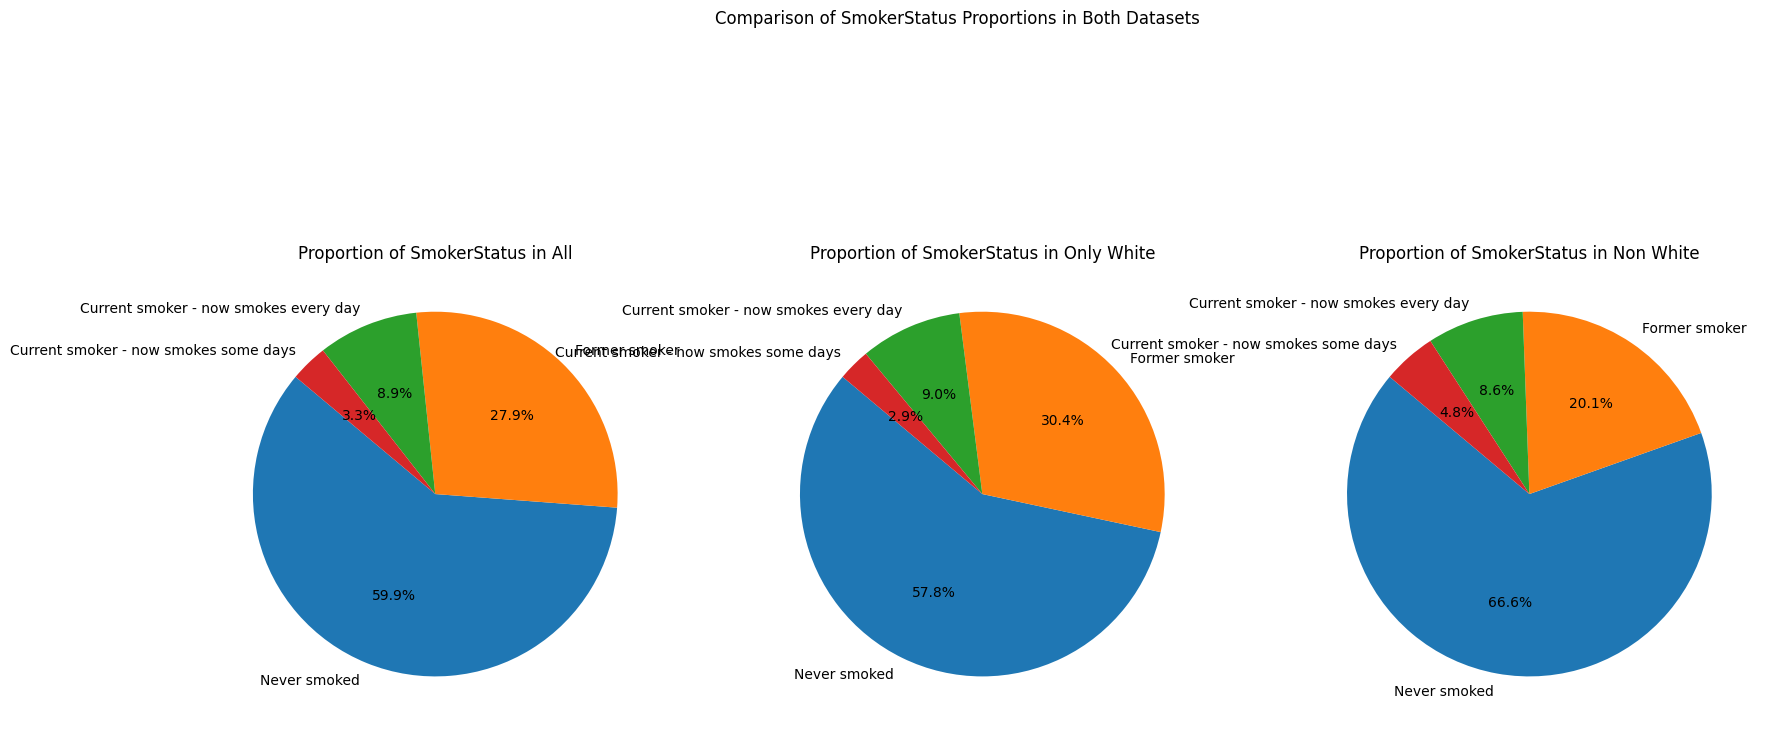

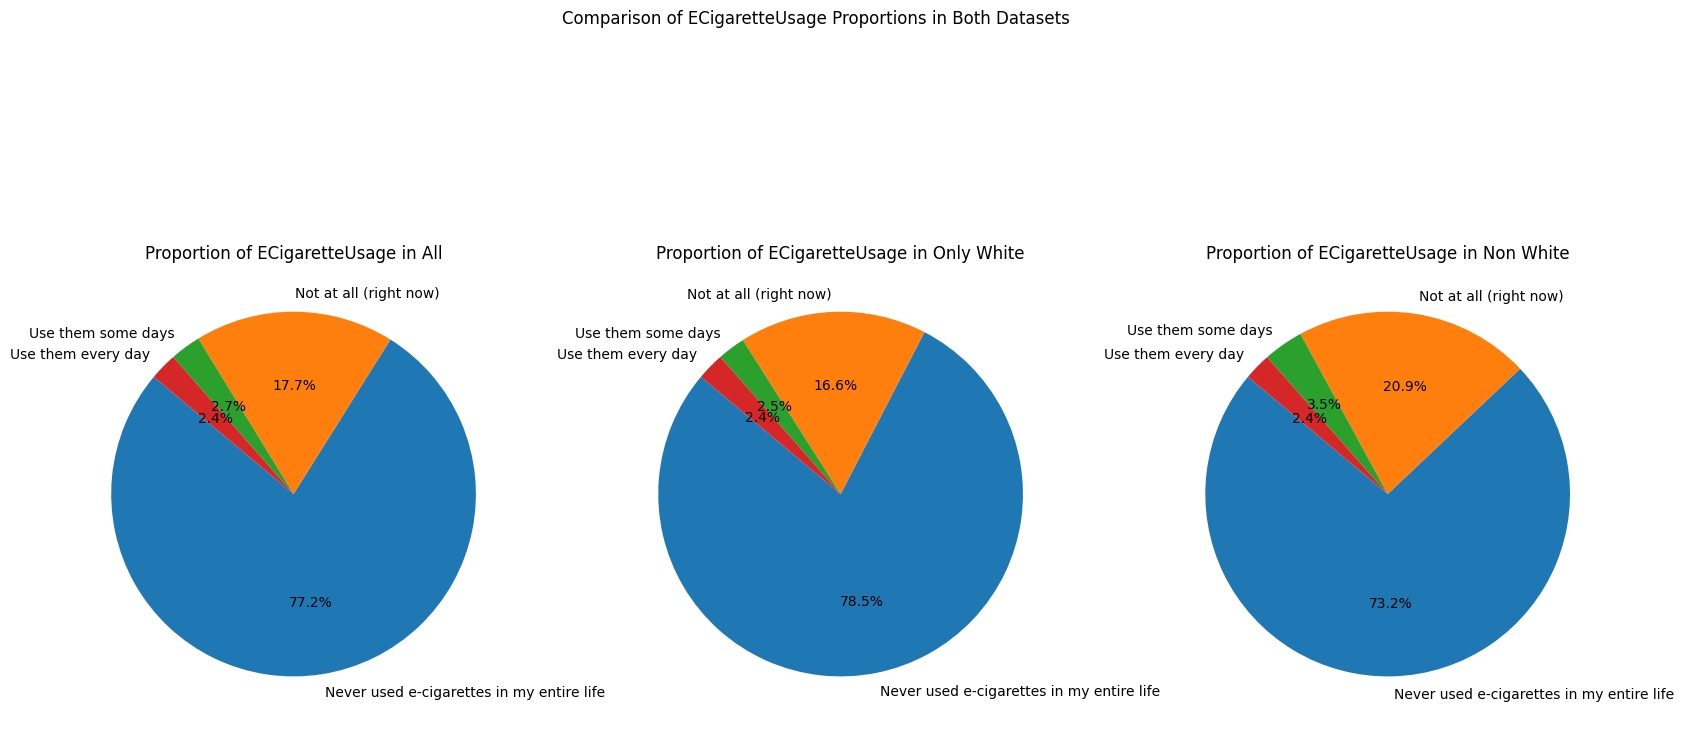

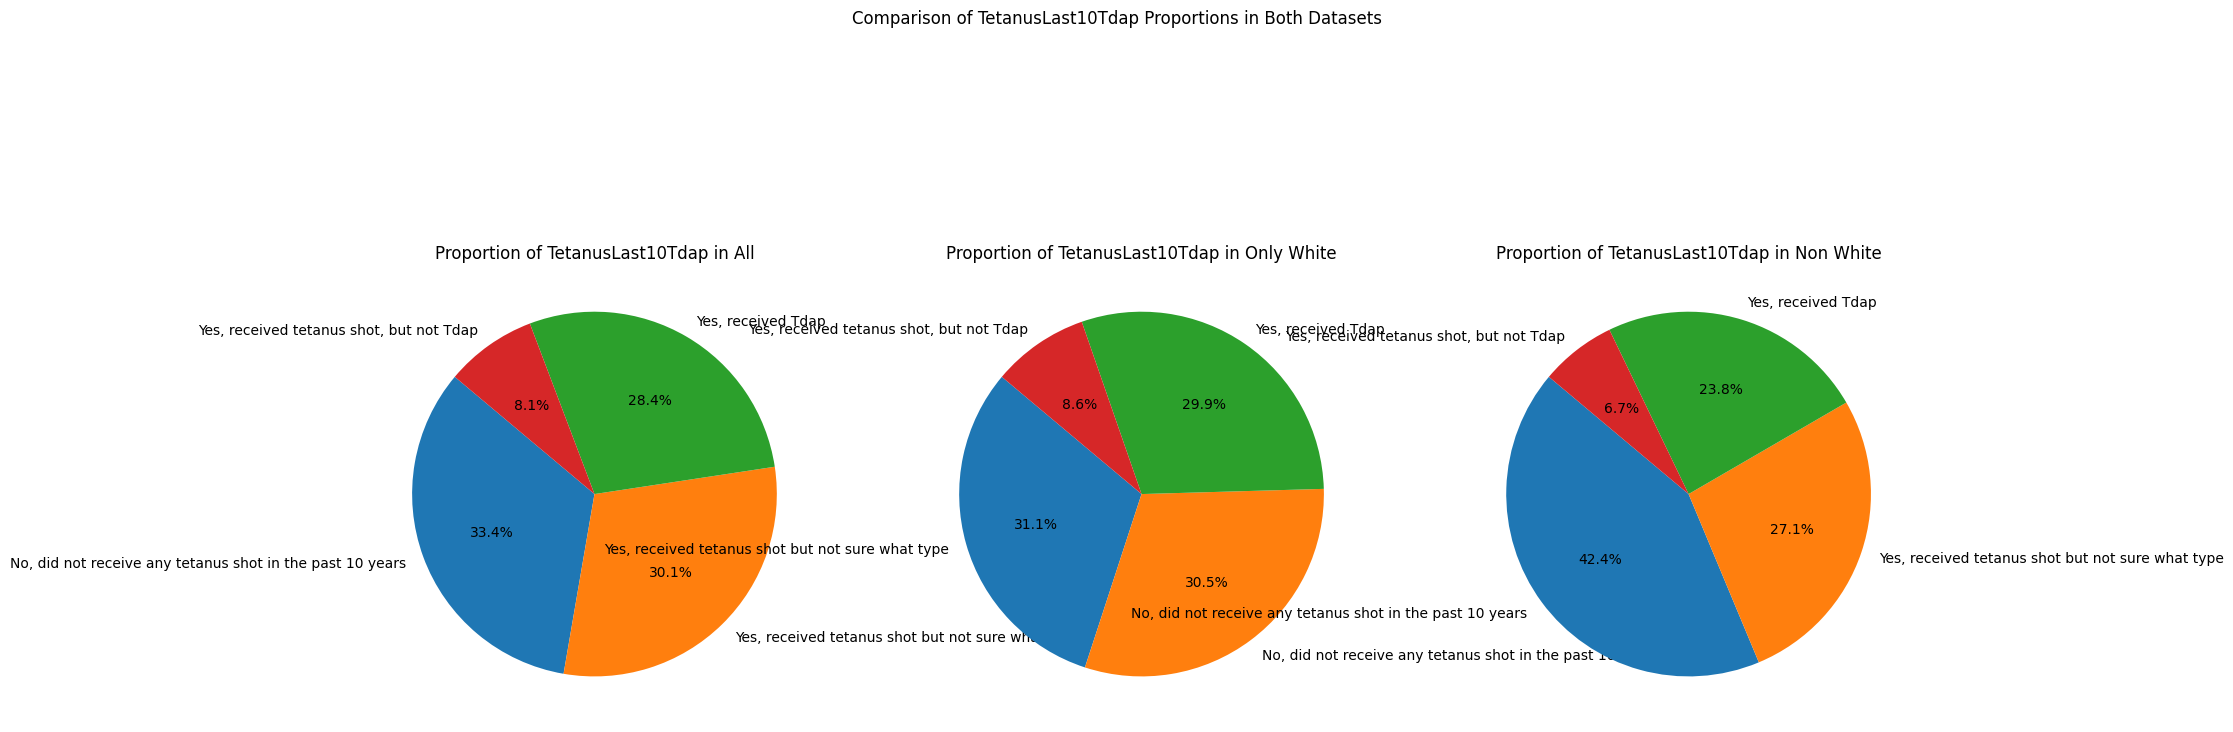

In [12]:
prop_plot_compare([data,"All"],[data_w,"Only White"],[data_nw,"Non White"],cat_col[2:])

The similarity in pie charts between White-only and minority groups suggests that the overrepresentation of White individuals does not significantly impact the proportions of categorical variables.


In [13]:
def hist_plot_compare(df0,df1, df2, cols):
    for col in cols:
        
        data_0 = df0[0][col]
        data_1 = df1[0][col]
        data_2 = df2[0][col]
        
 
        fig, axes = plt.subplots(1, 3, figsize=(20, 12), sharey=True)
        
 
        axes[0].hist(data_0, bins=10, color='skyblue', edgecolor='black', alpha=0.7,density=True)
        axes[0].set_title(f"Distribution of {col} in {df0[1]}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequency")
        

        axes[1].hist(data_1, bins=10, color='salmon', edgecolor='black', alpha=0.7,density=True)
        axes[1].set_title(f"Distribution of {col} in {df1[1]}")
        axes[1].set_xlabel(col)
        
        axes[2].hist(data_2, bins=10, color='salmon', edgecolor='black', alpha=0.7,density=True)
        axes[2].set_title(f"Distribution of {col} in {df2[1]}")
        axes[2].set_xlabel(col)
        

        plt.suptitle(f"Comparison of {col} Distributions in Both Datasets")
        plt.show()


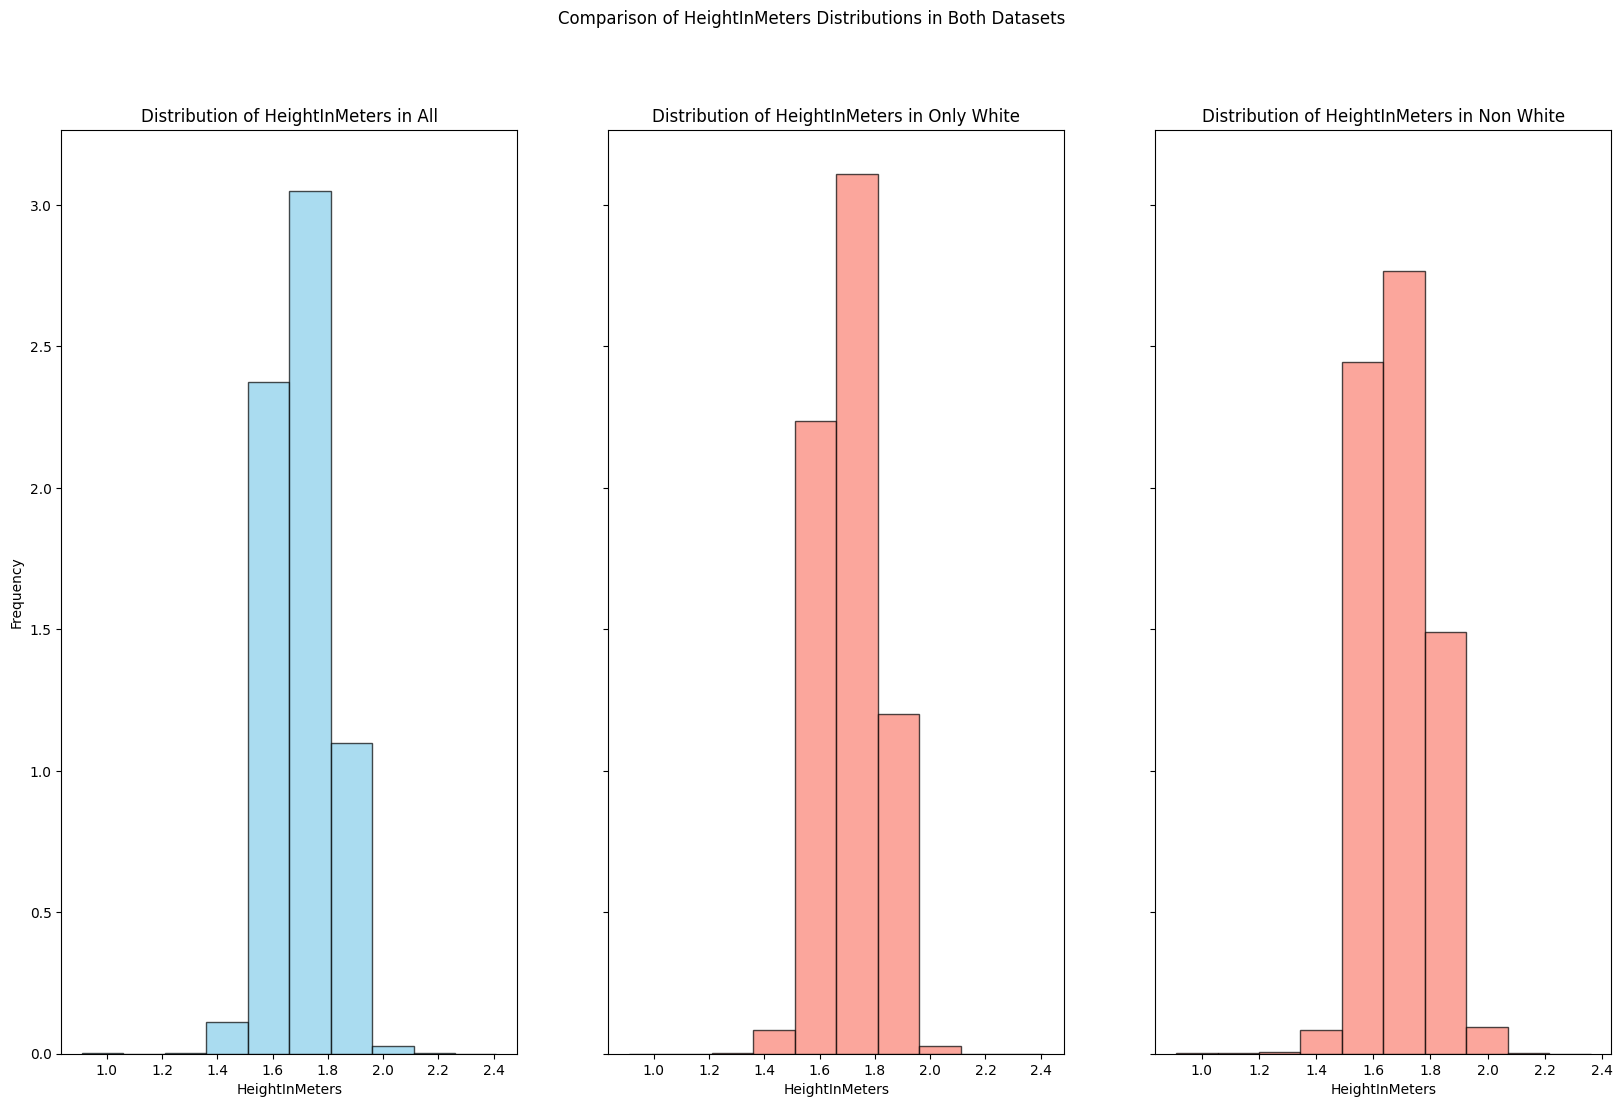

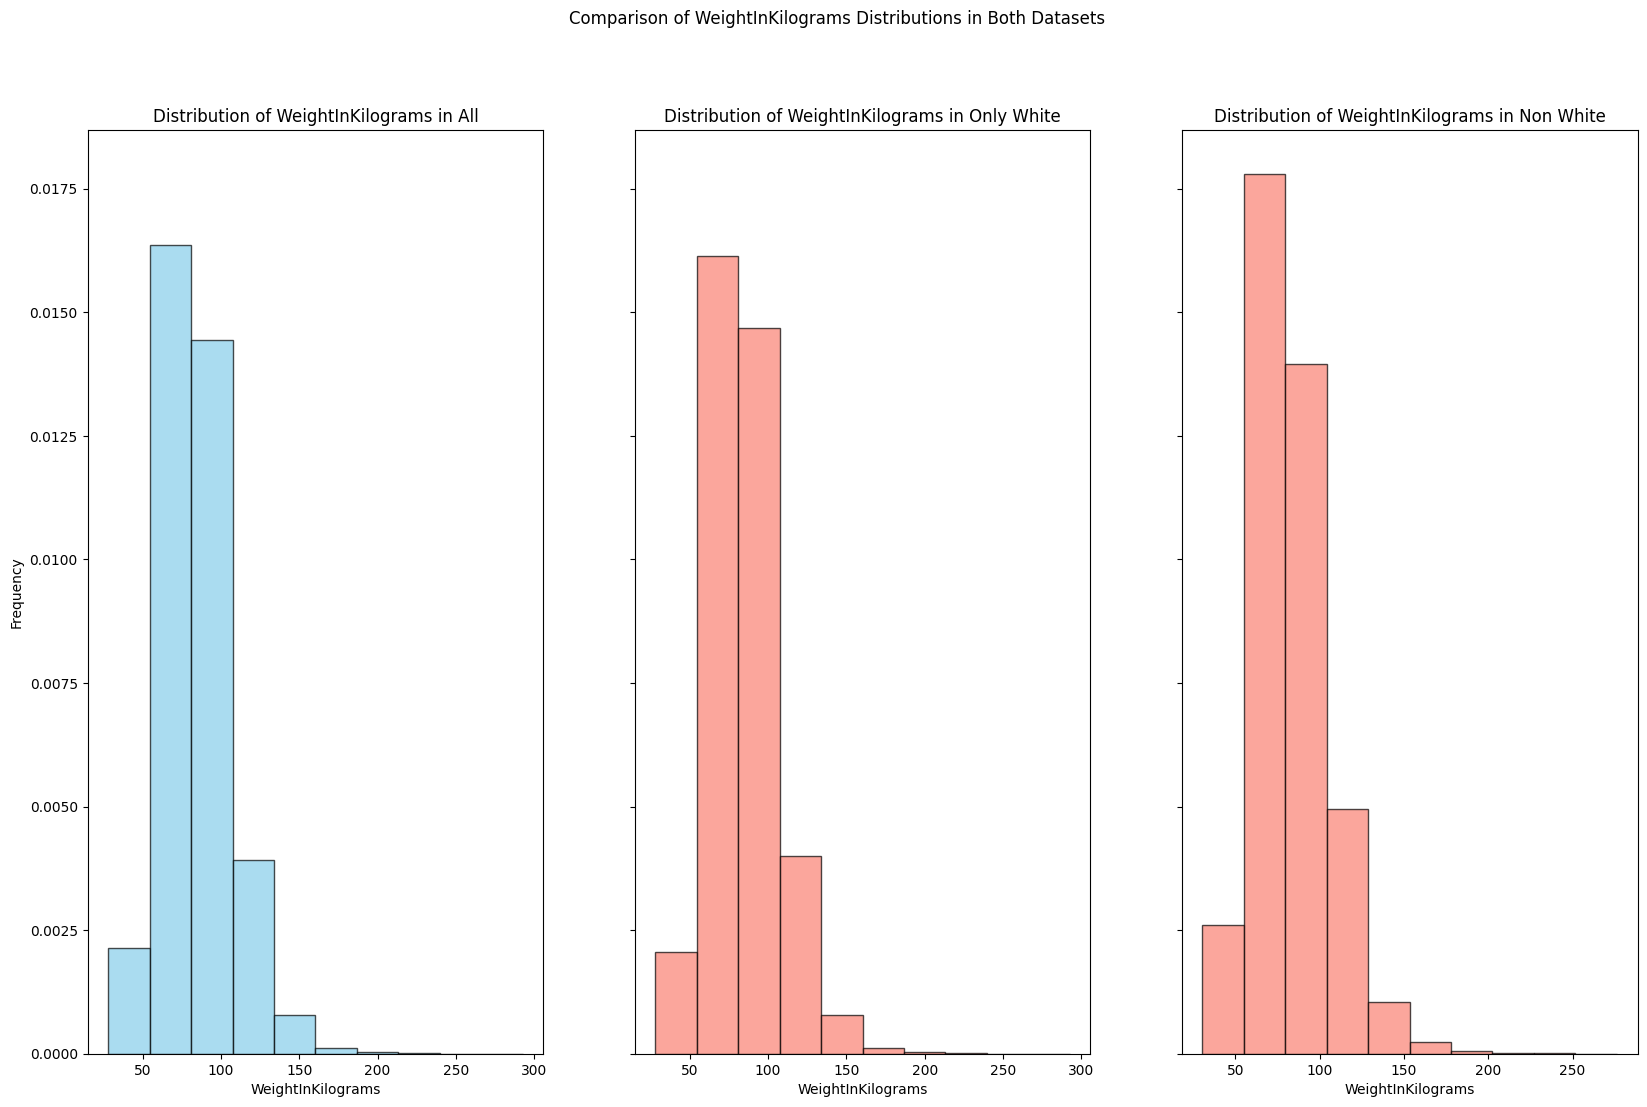

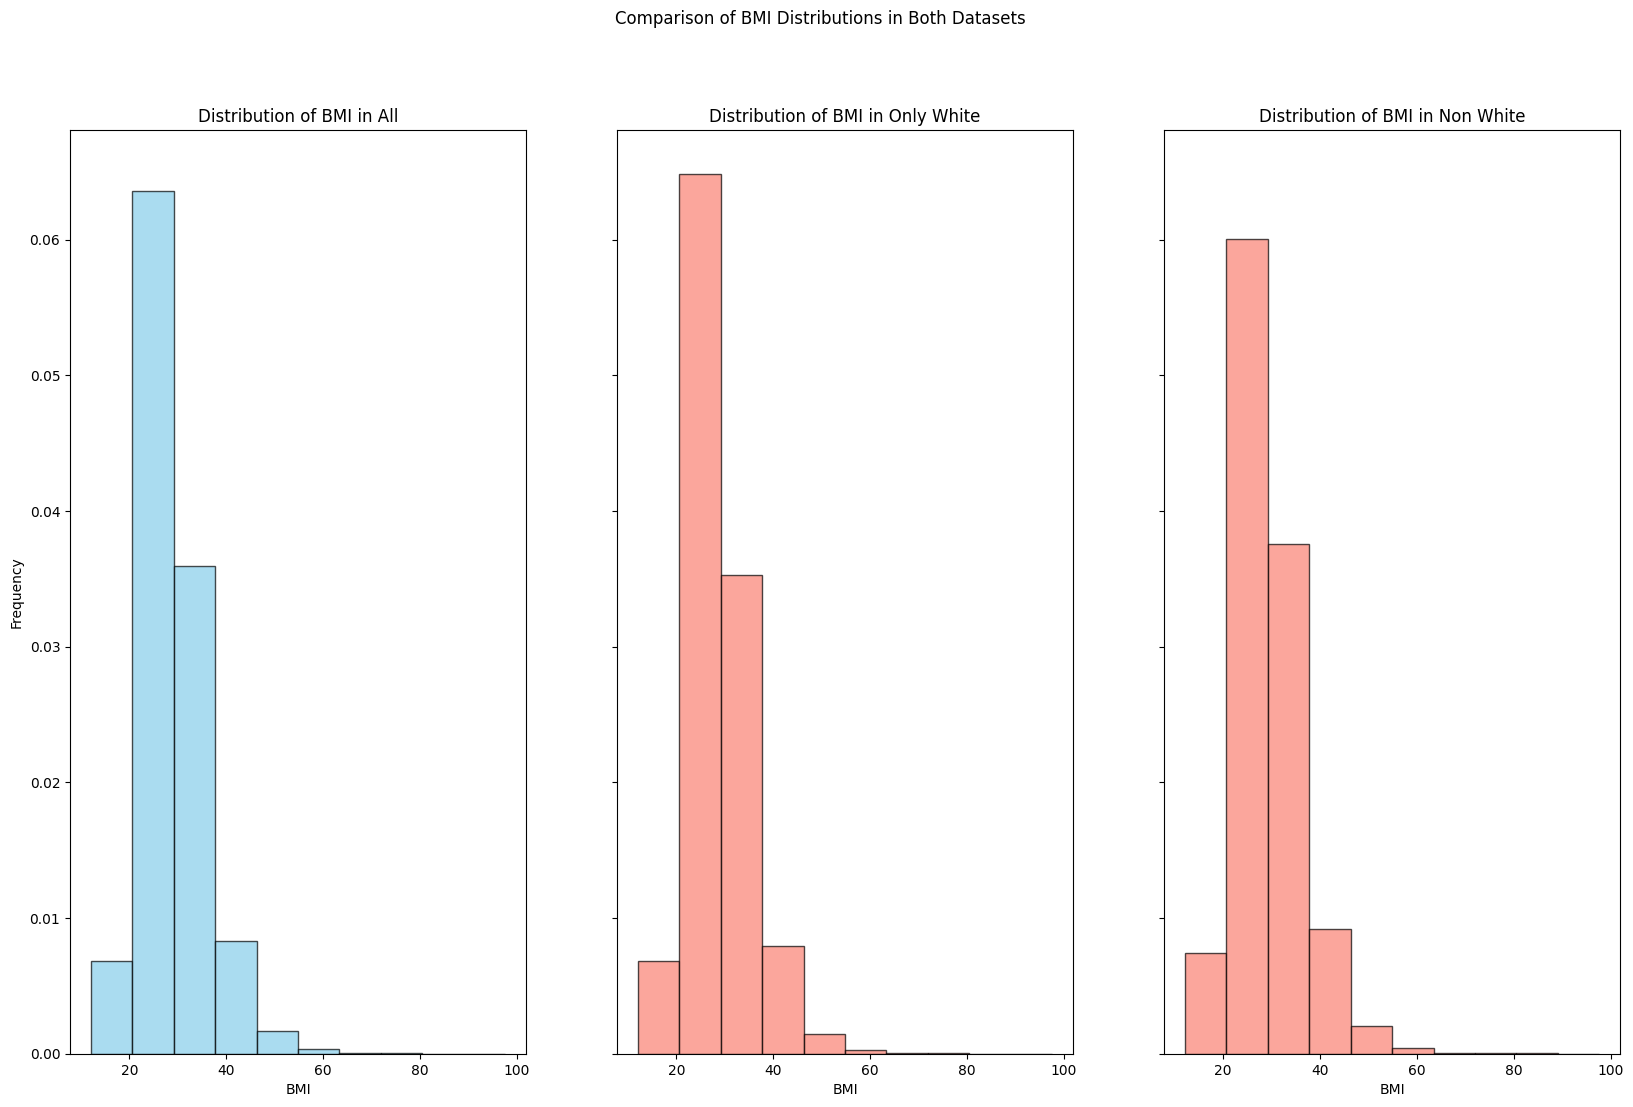

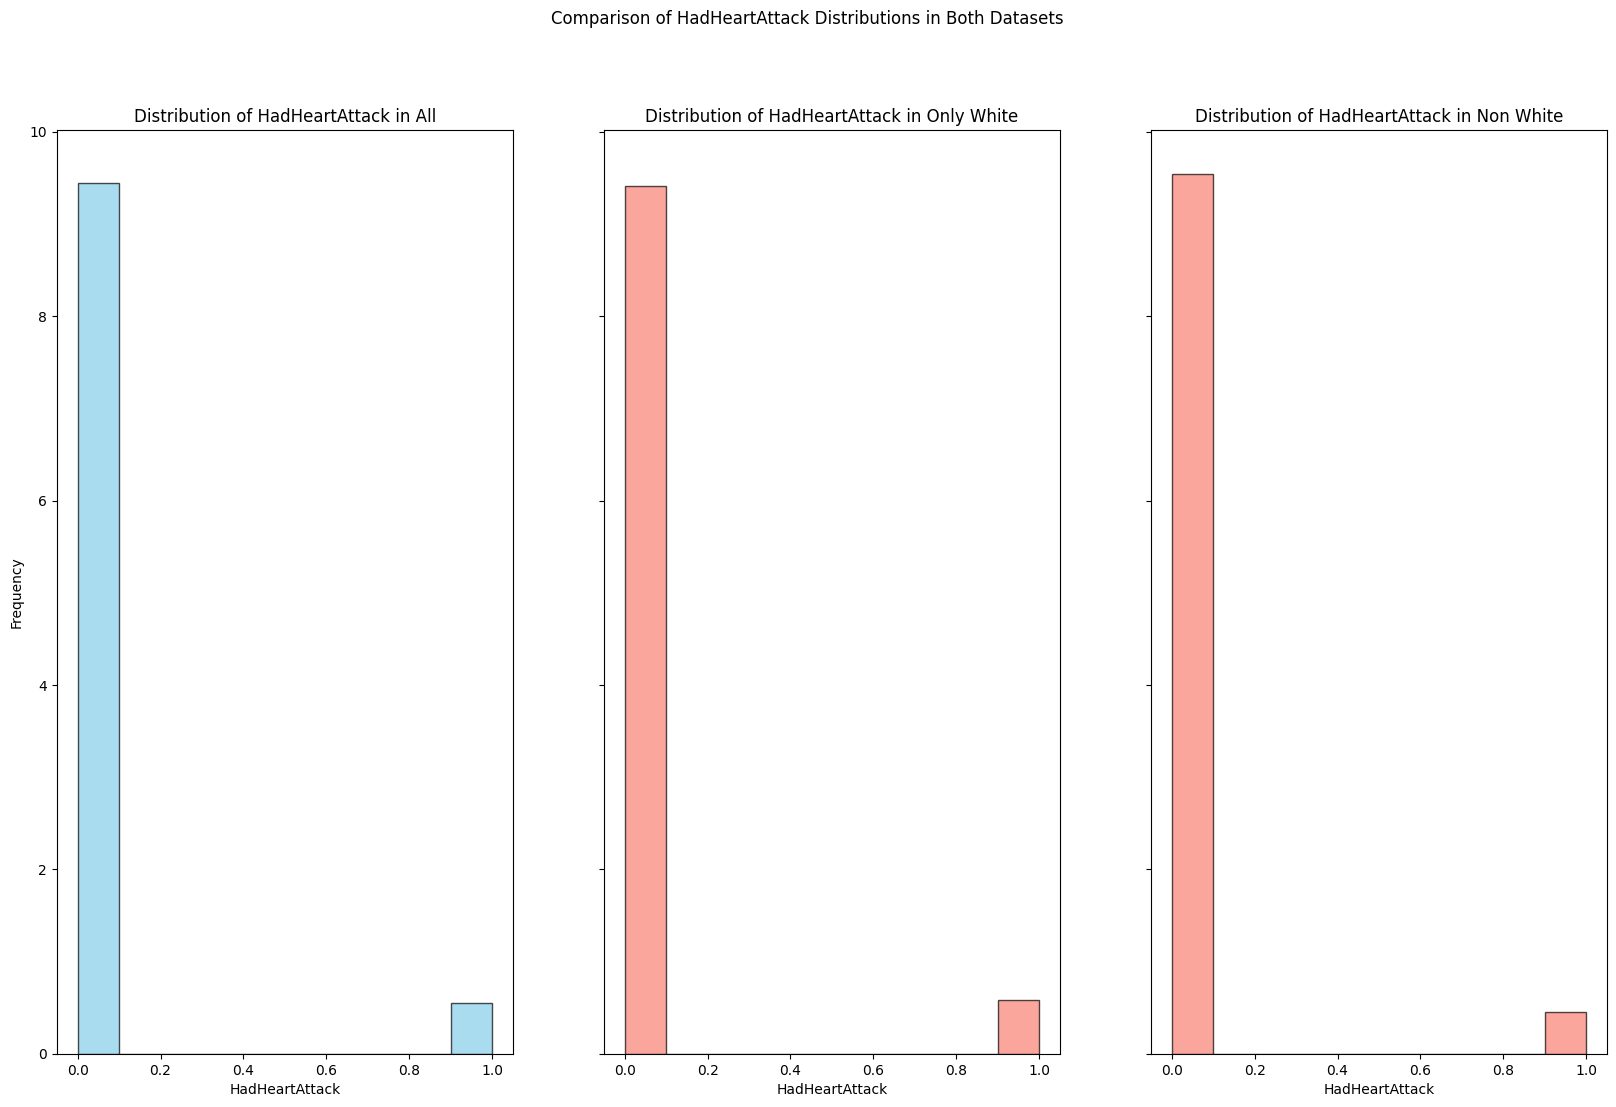

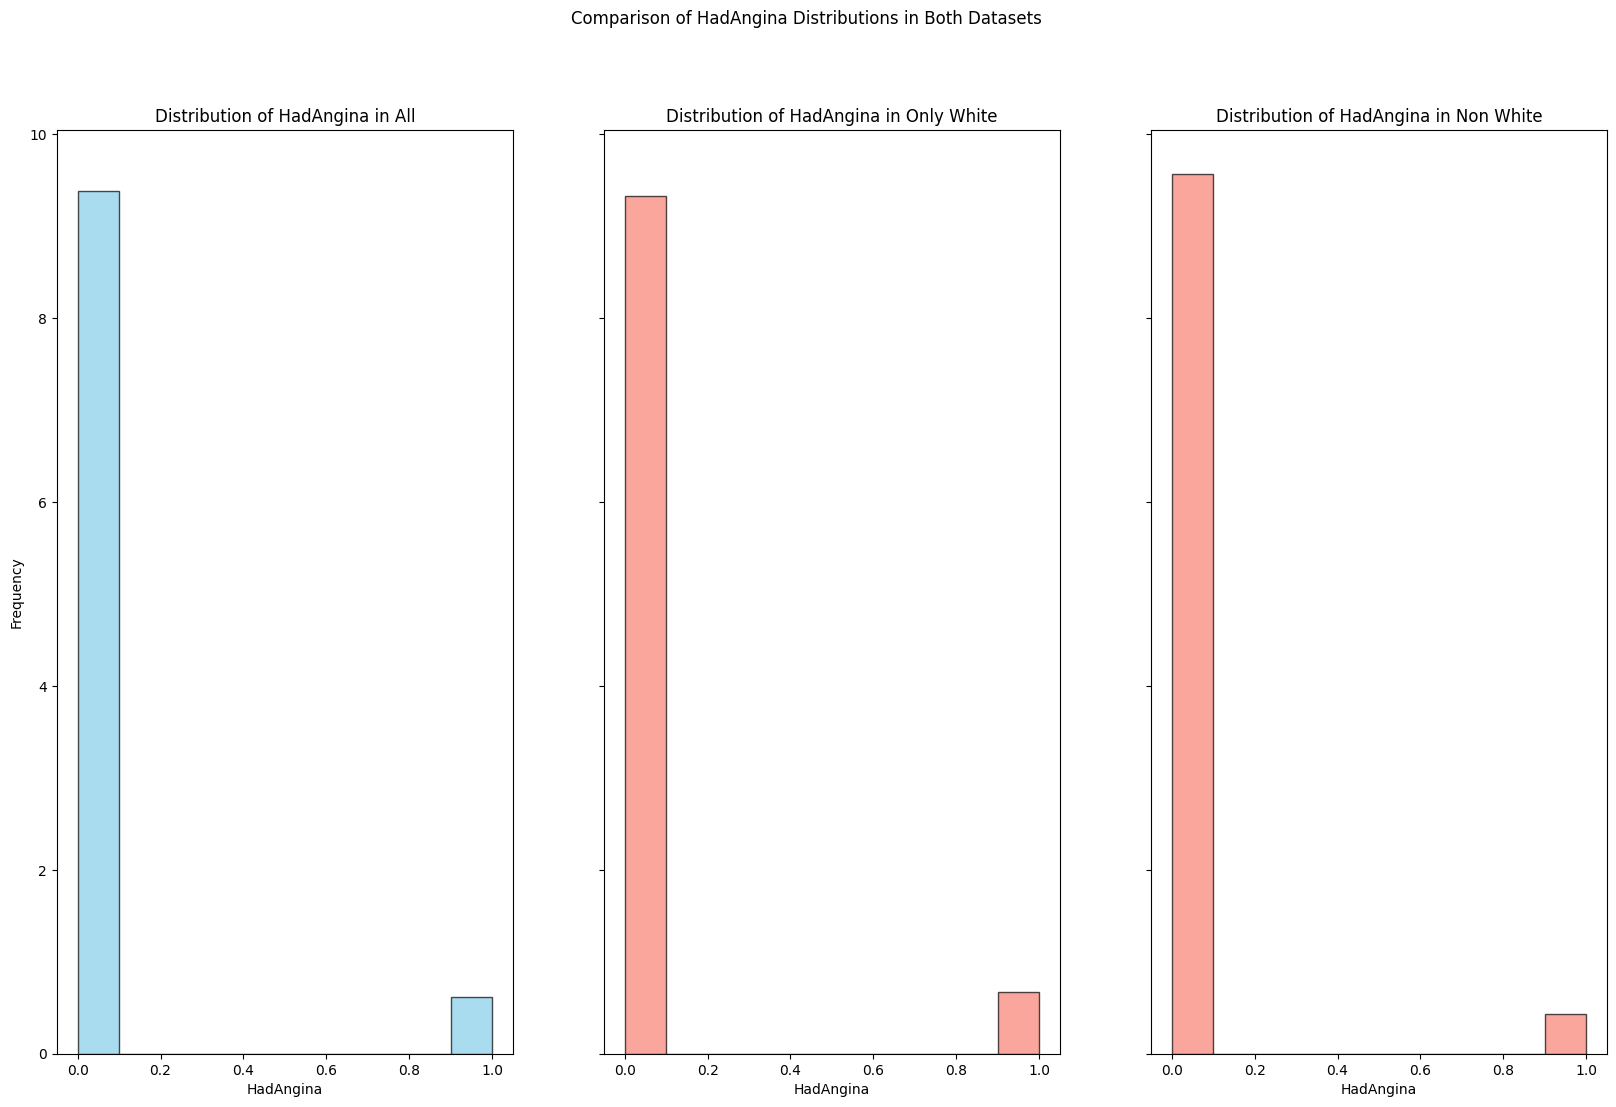

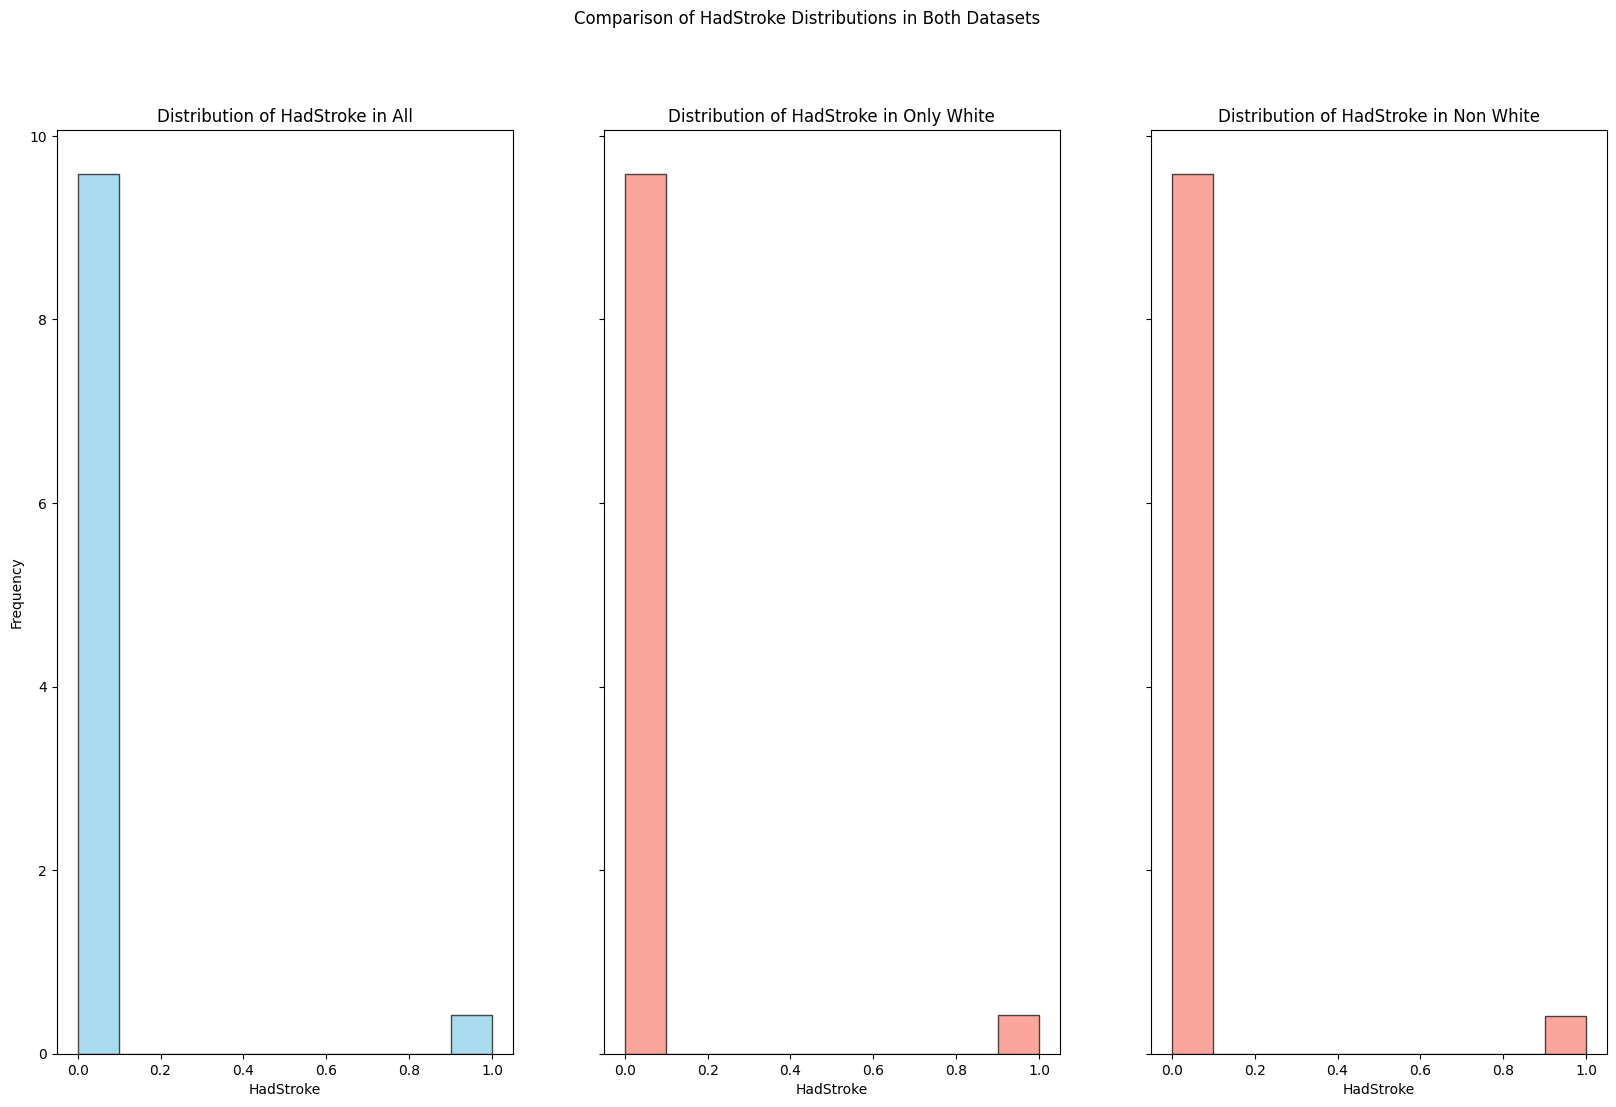

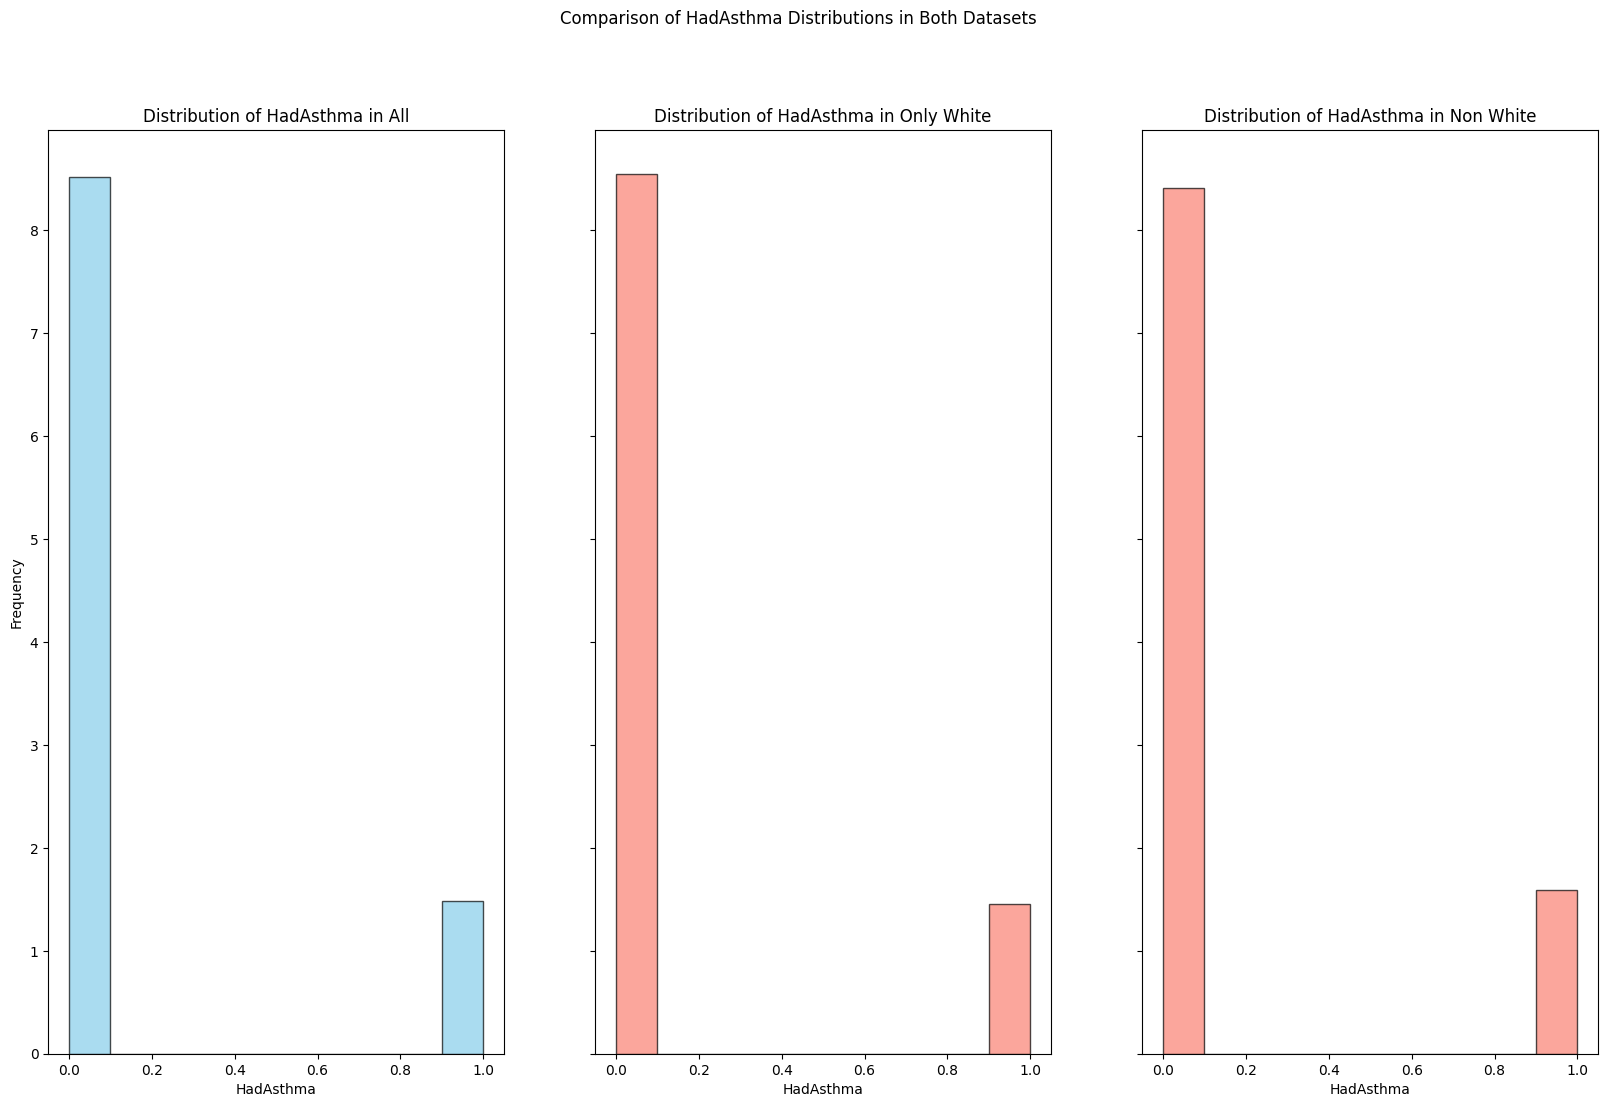

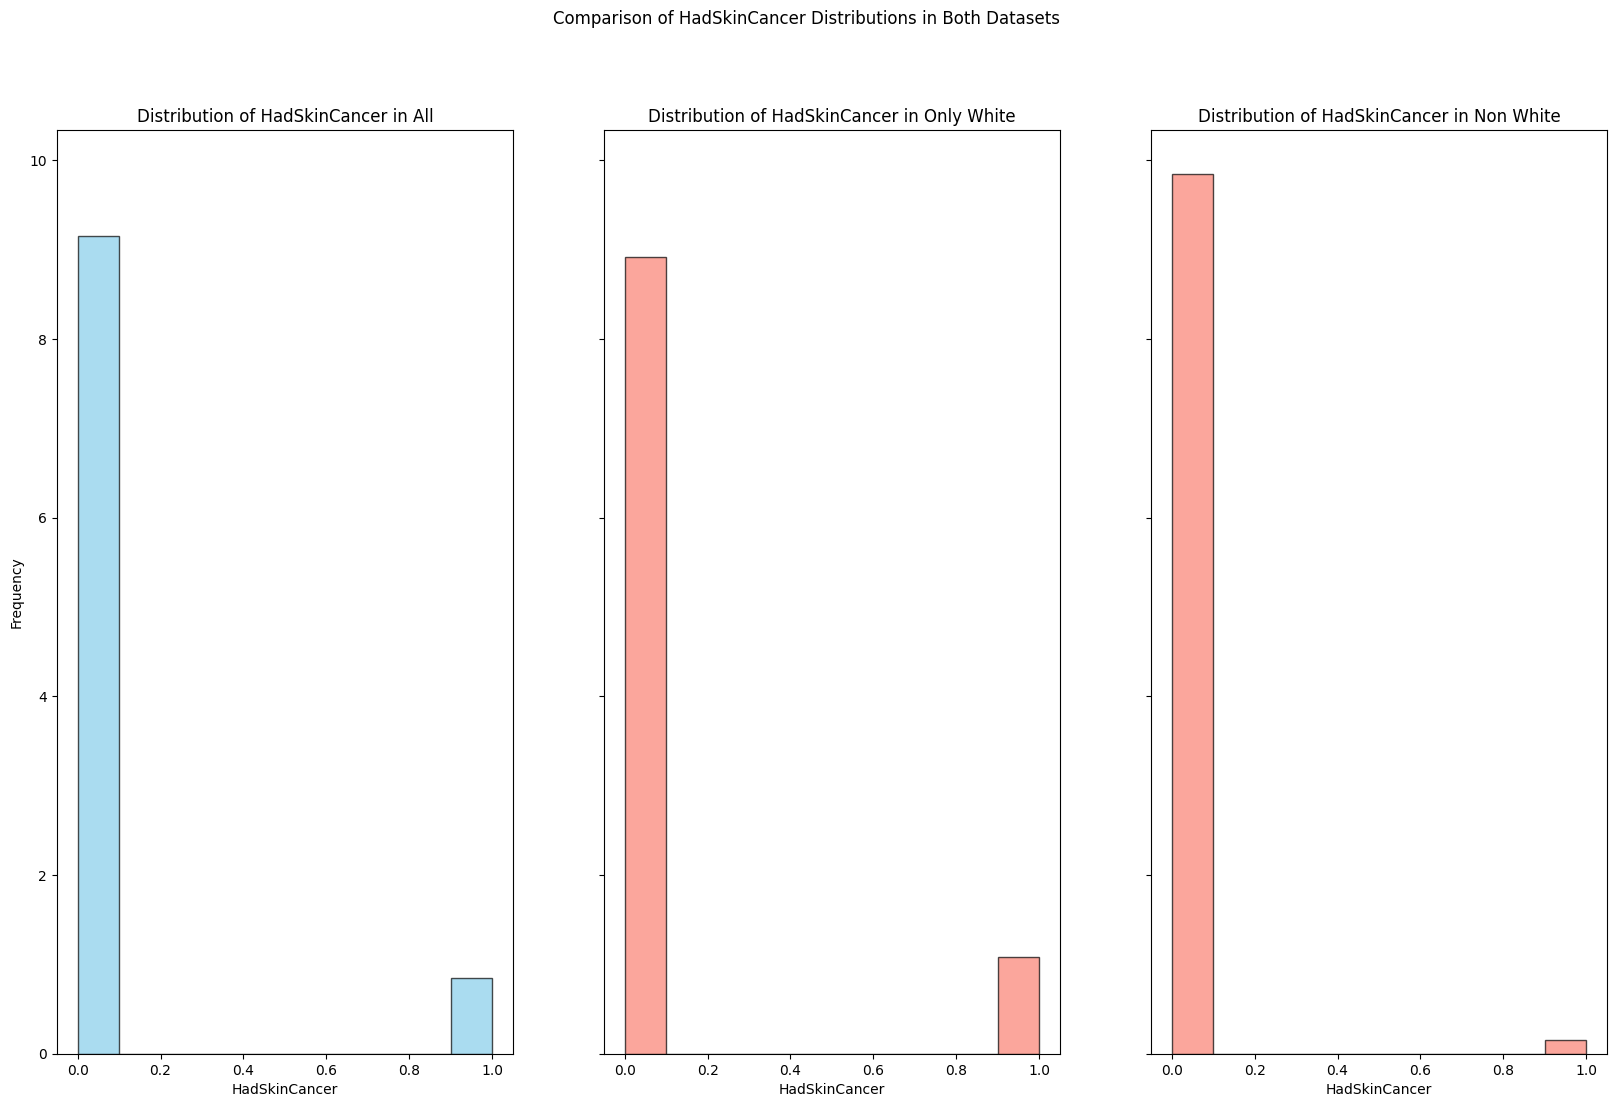

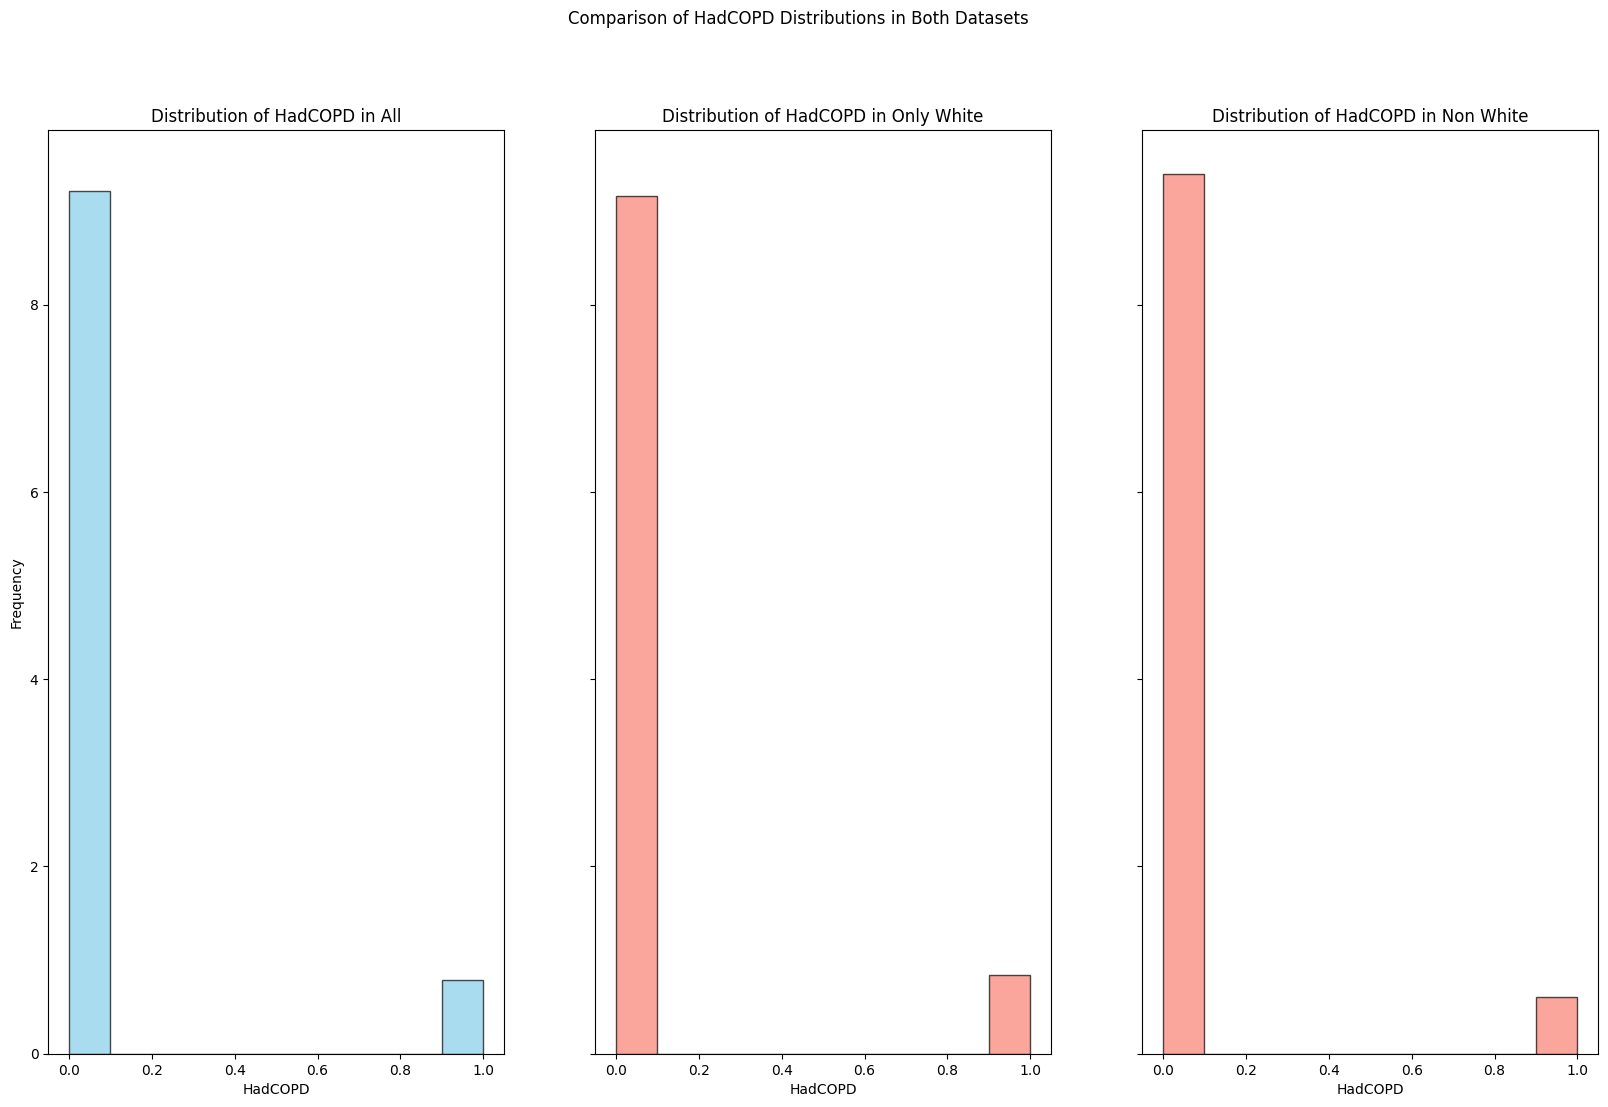

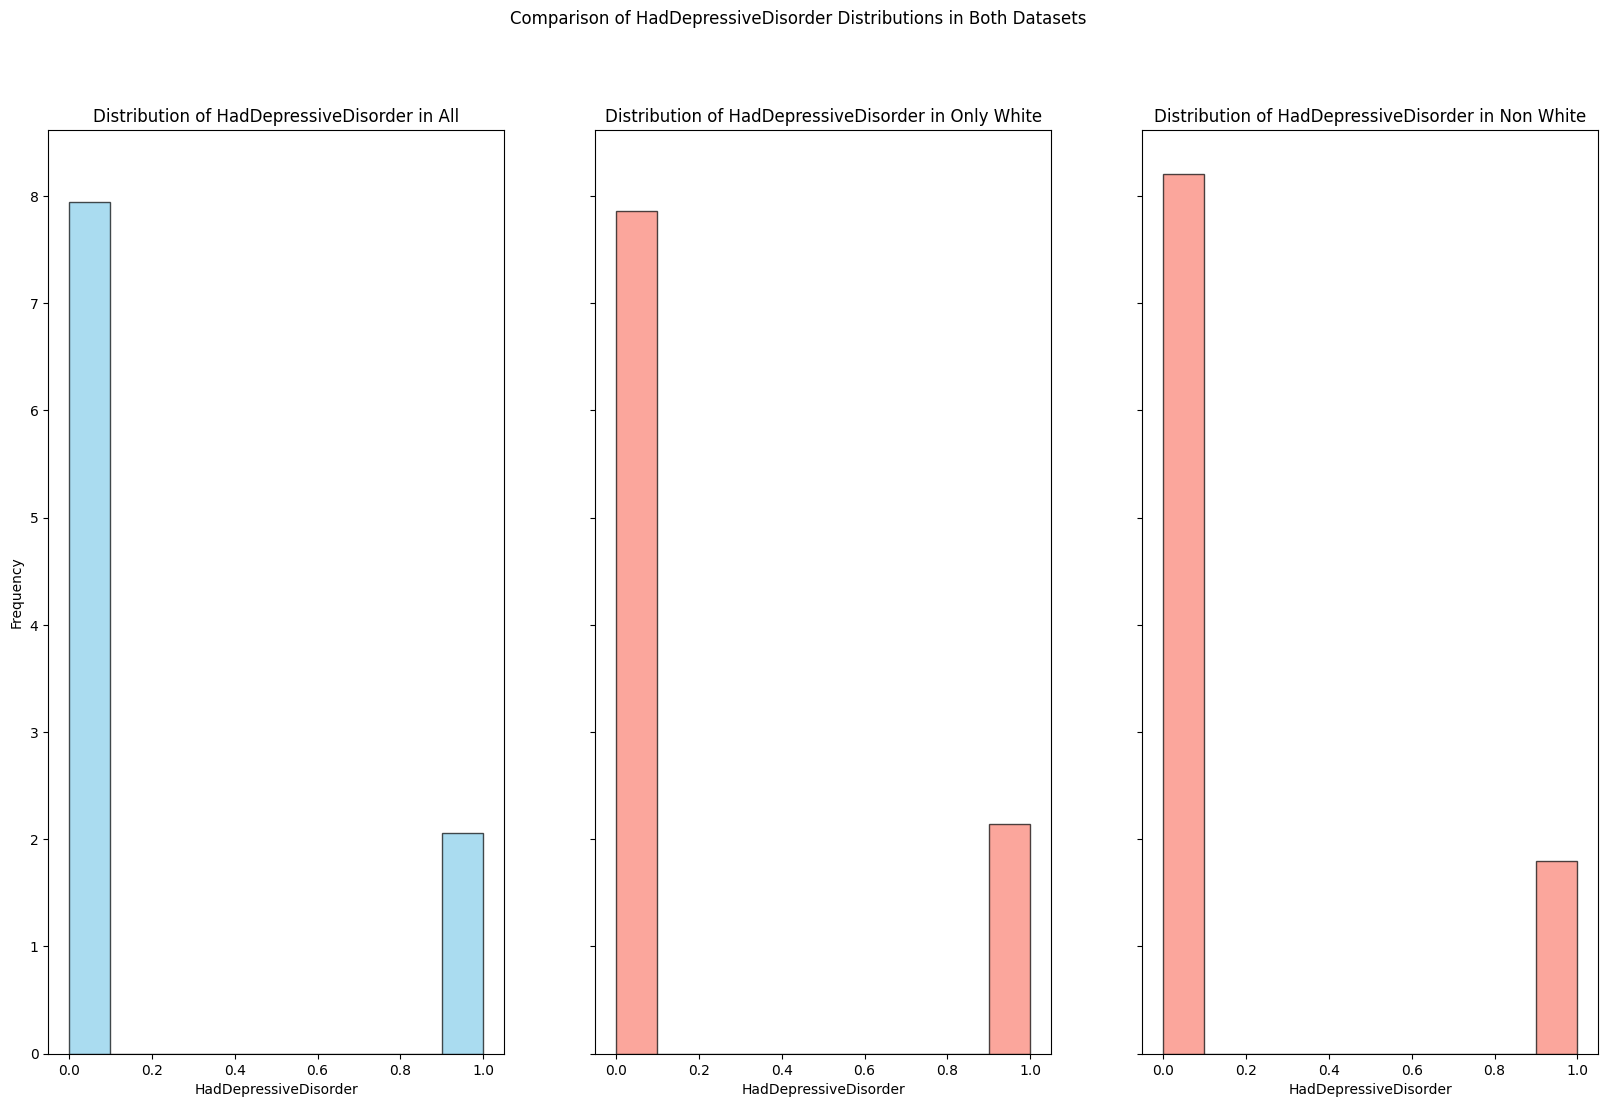

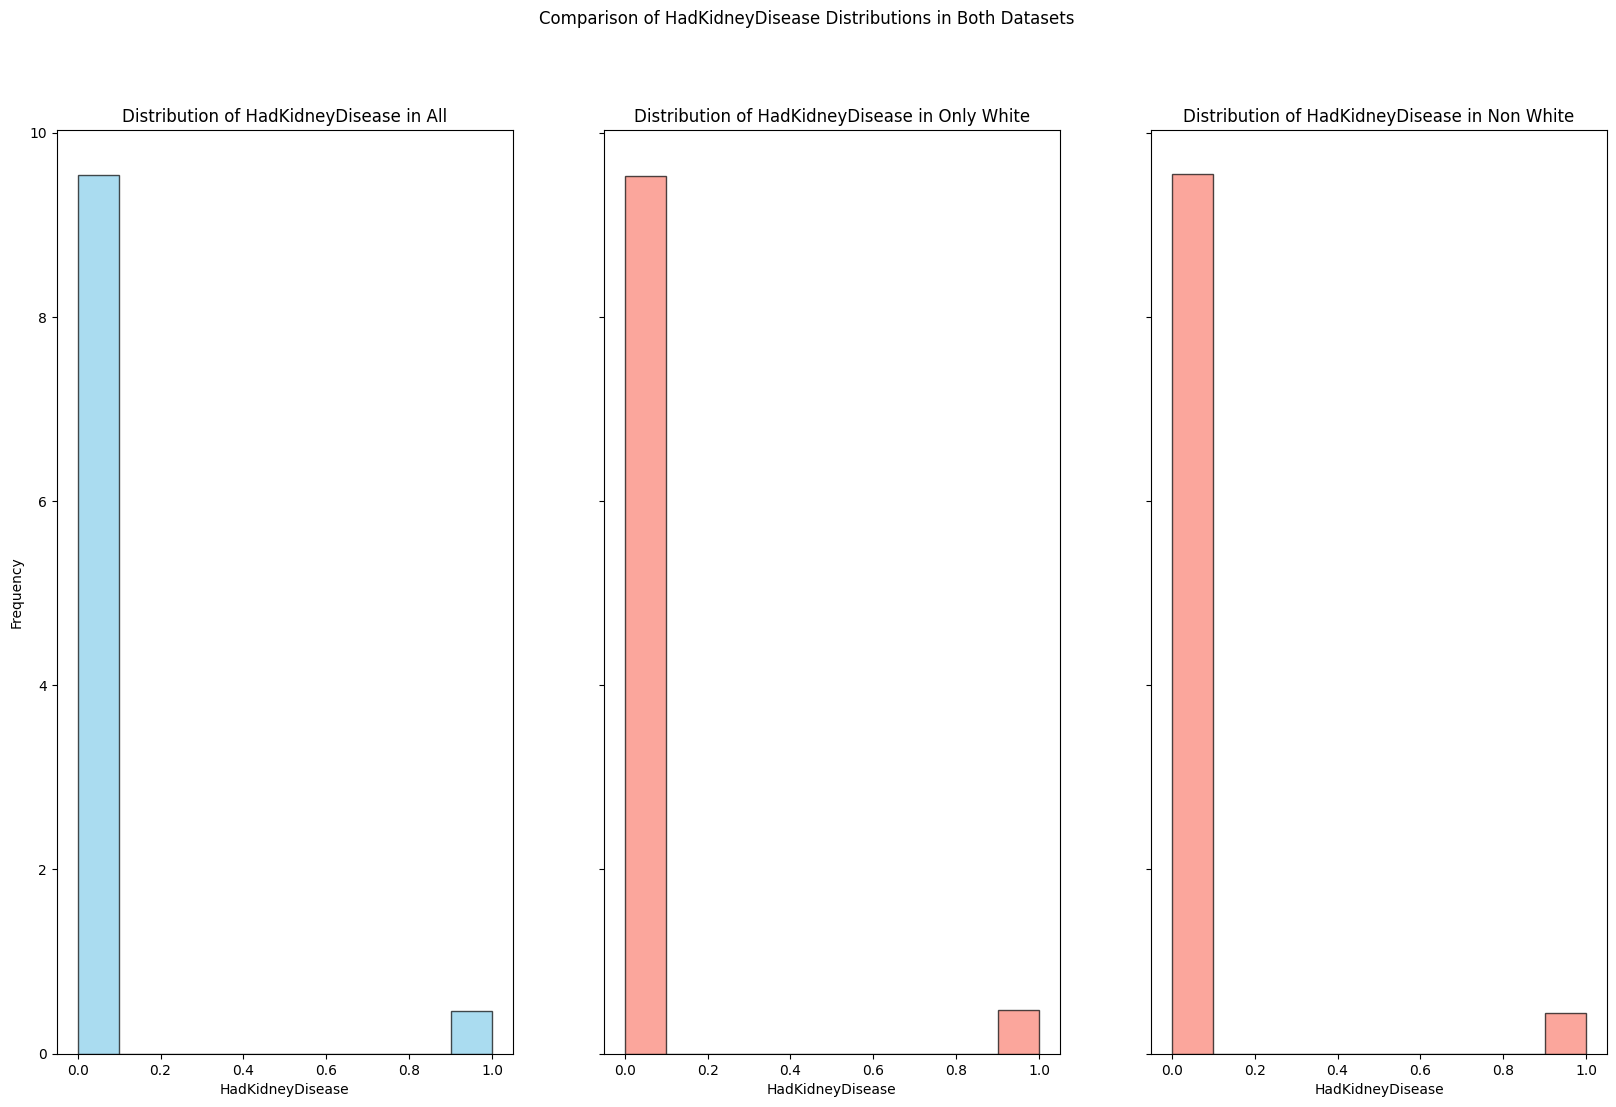

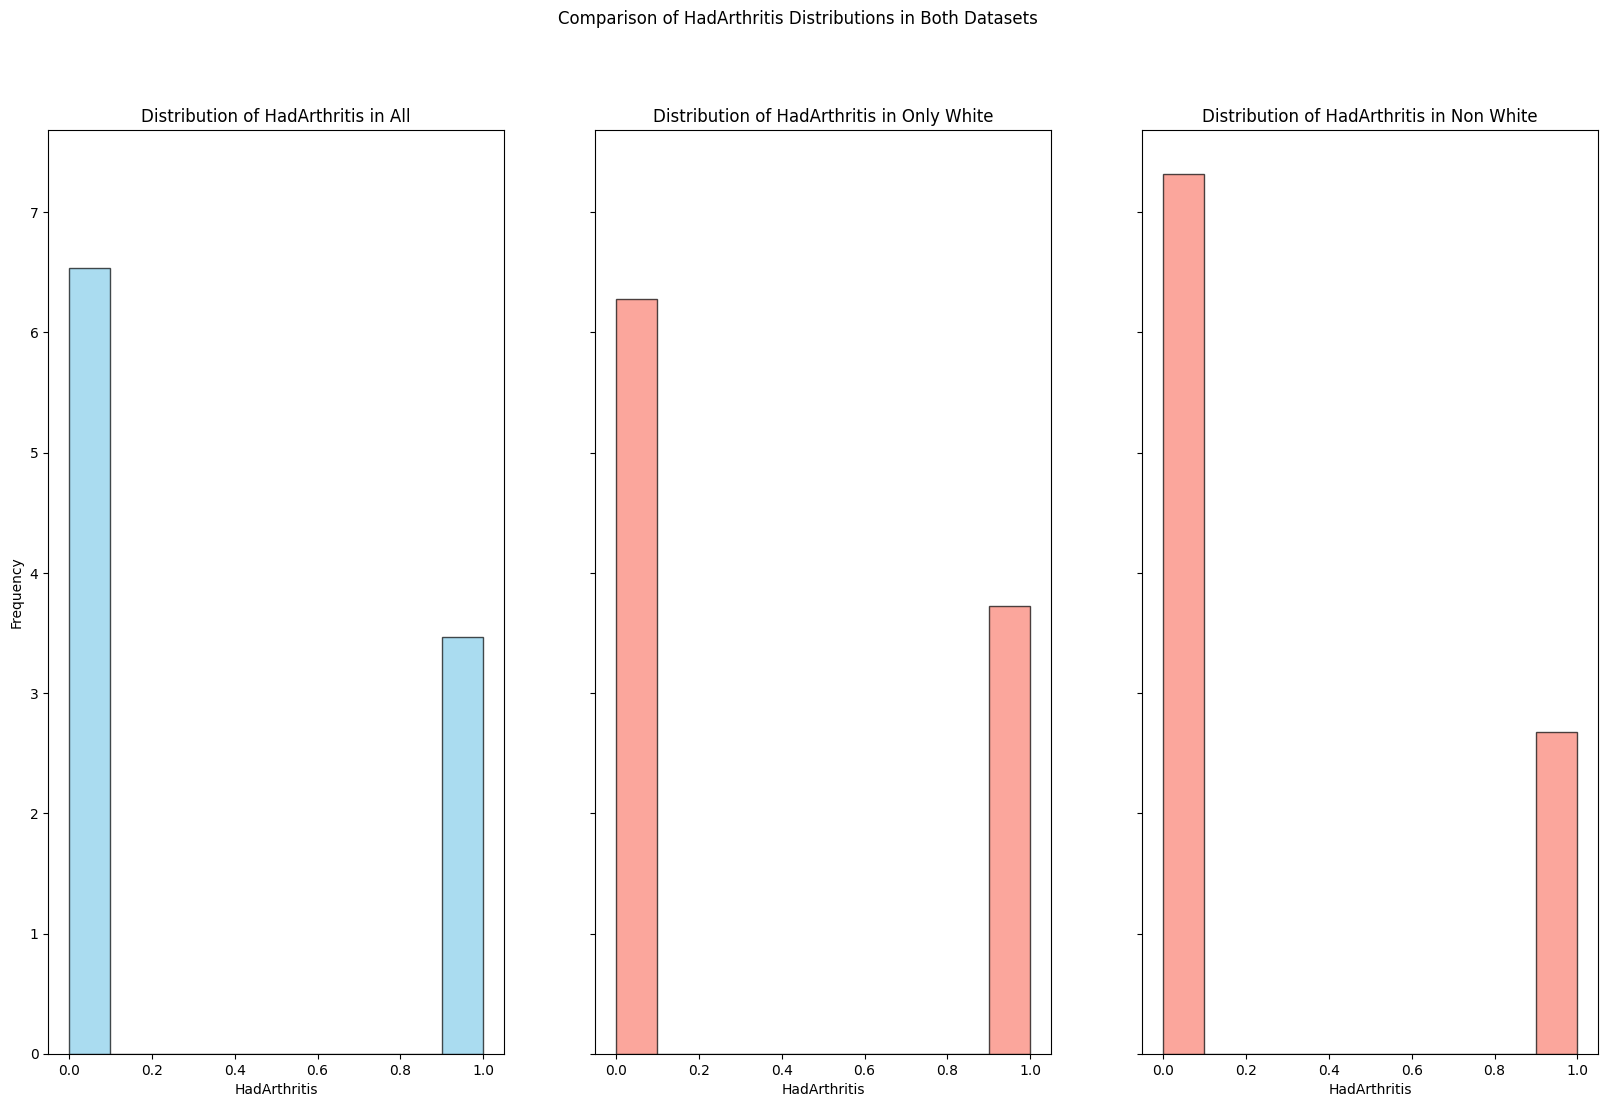

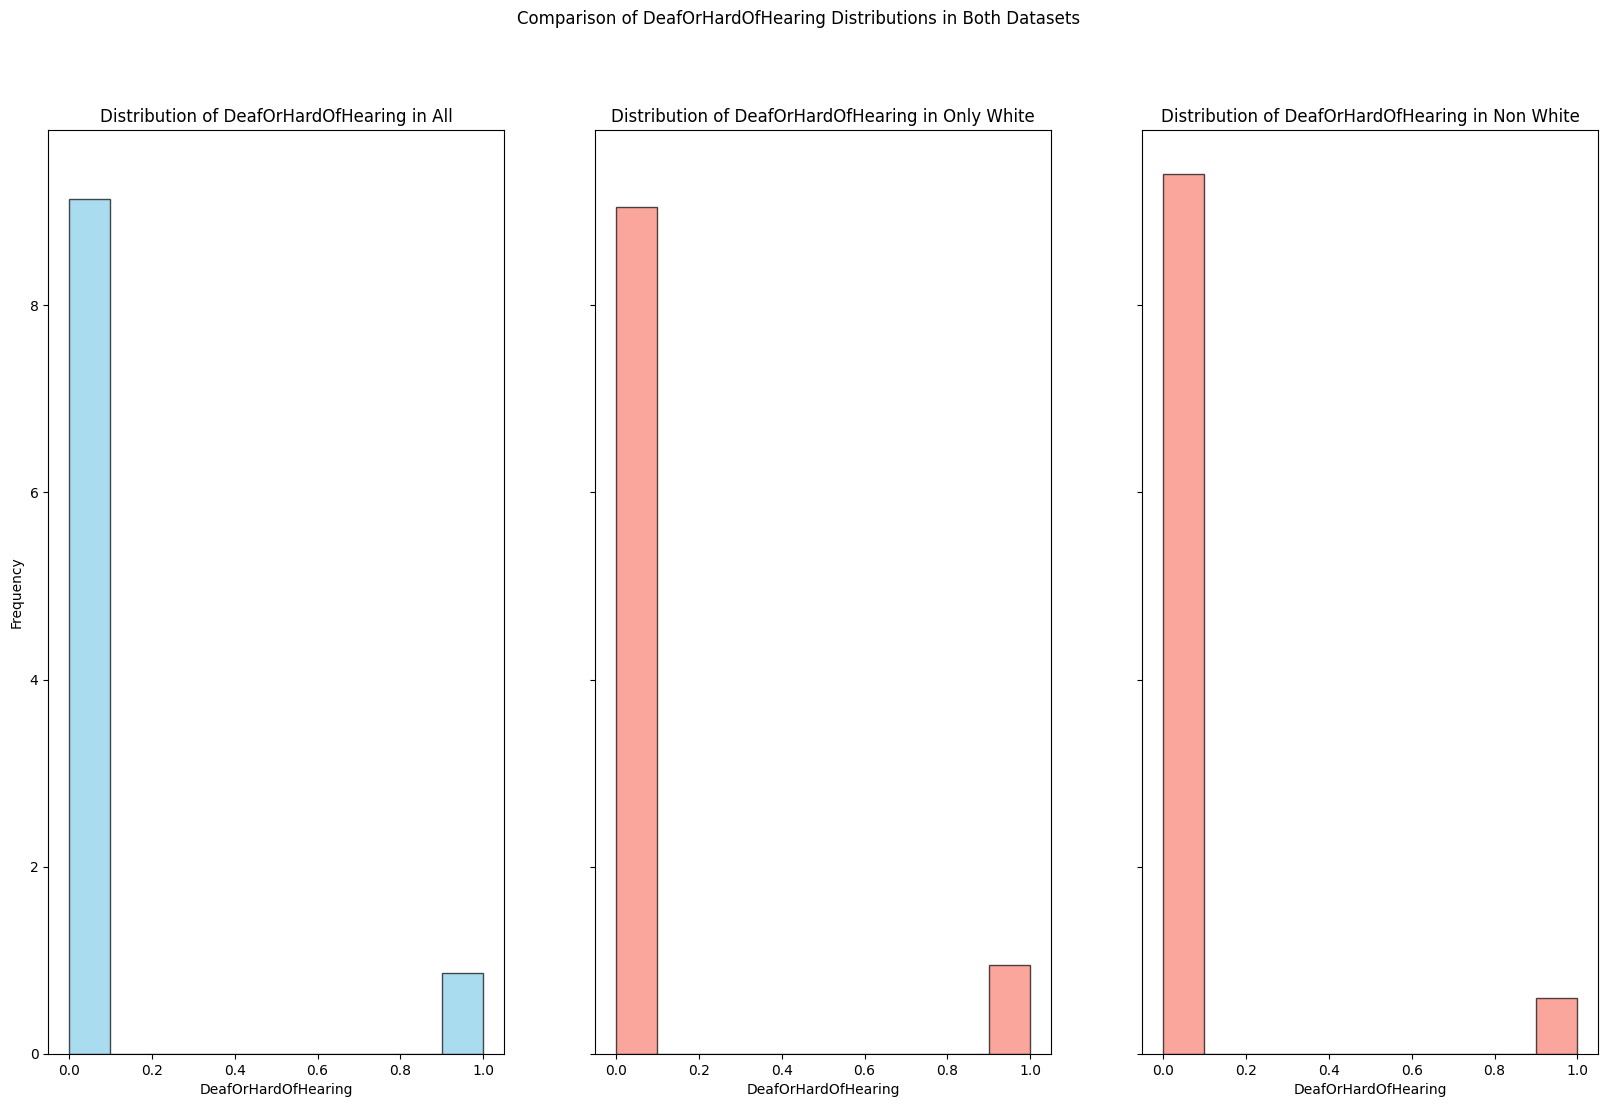

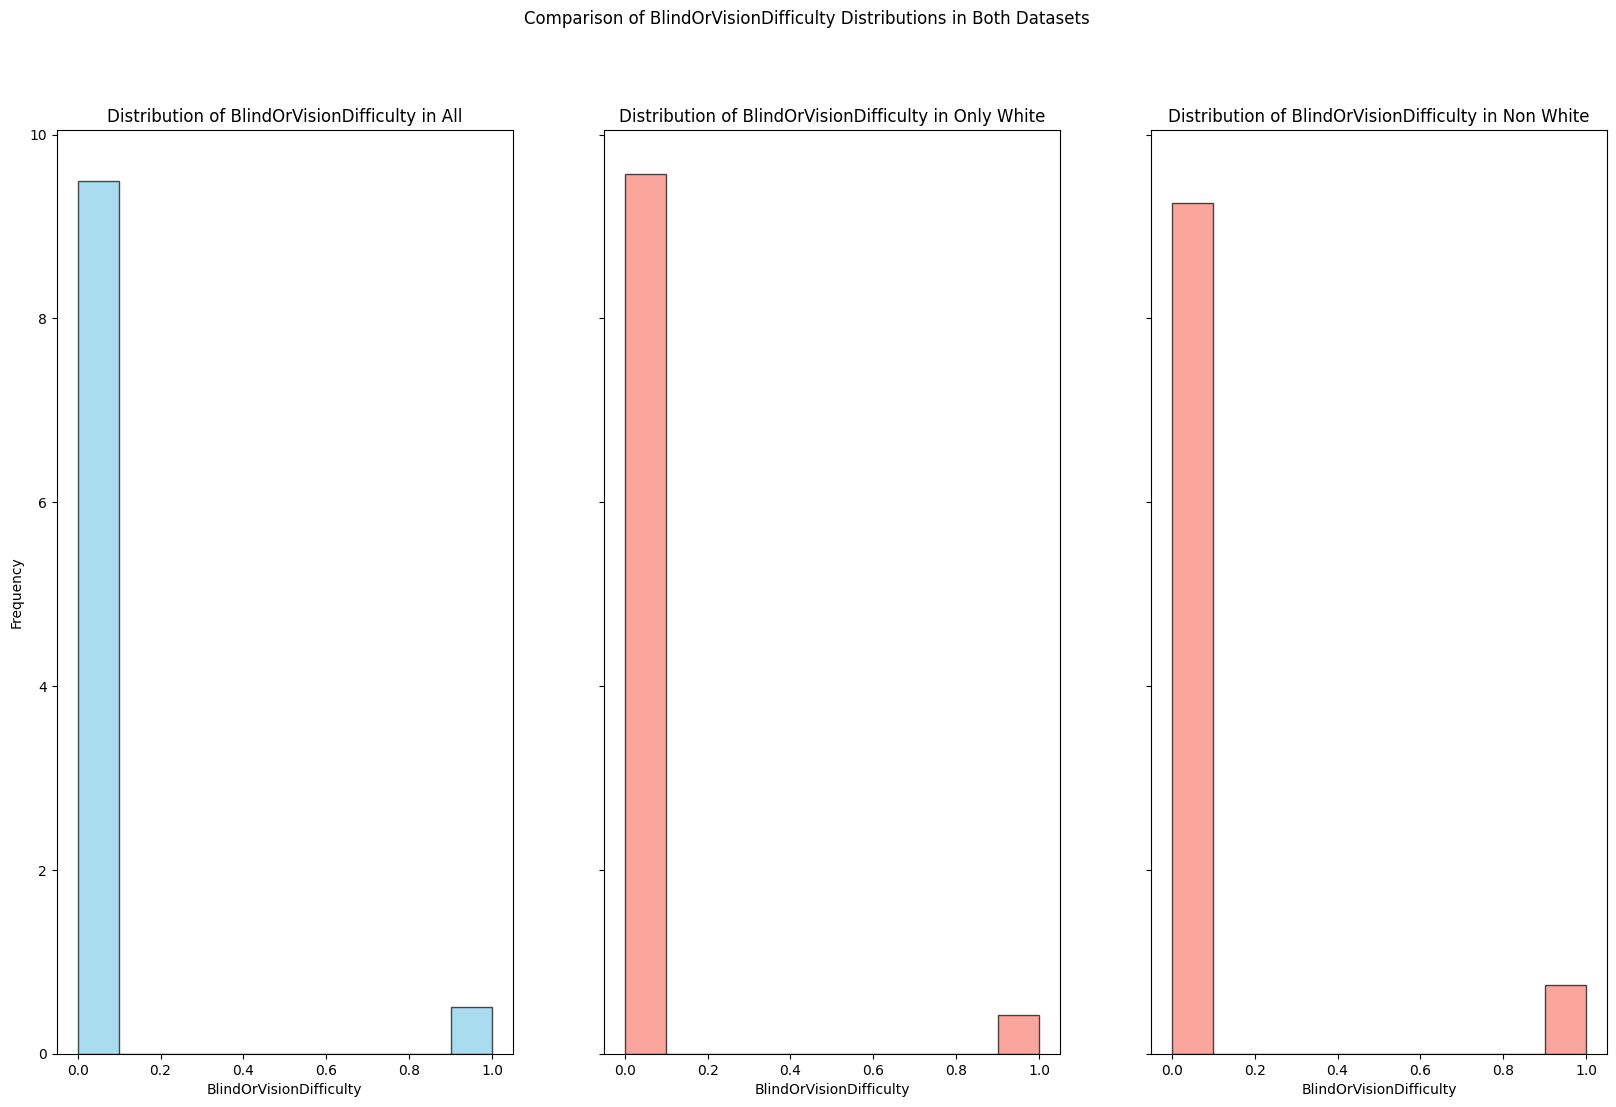

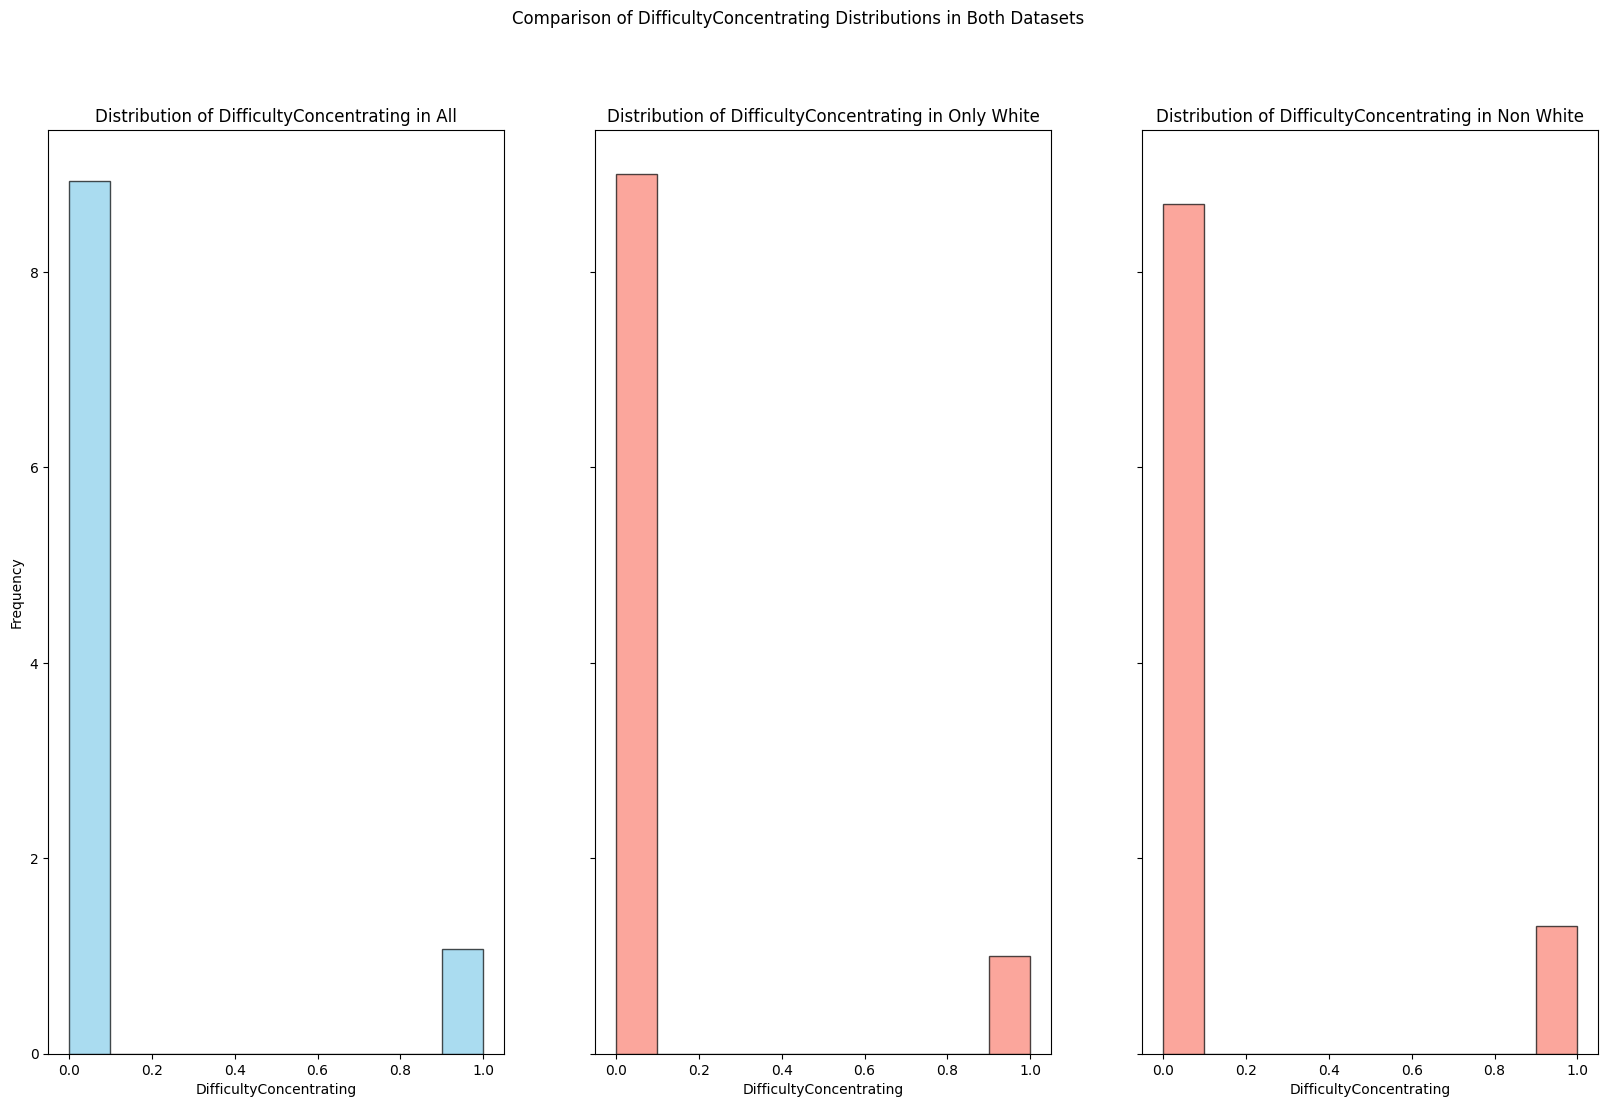

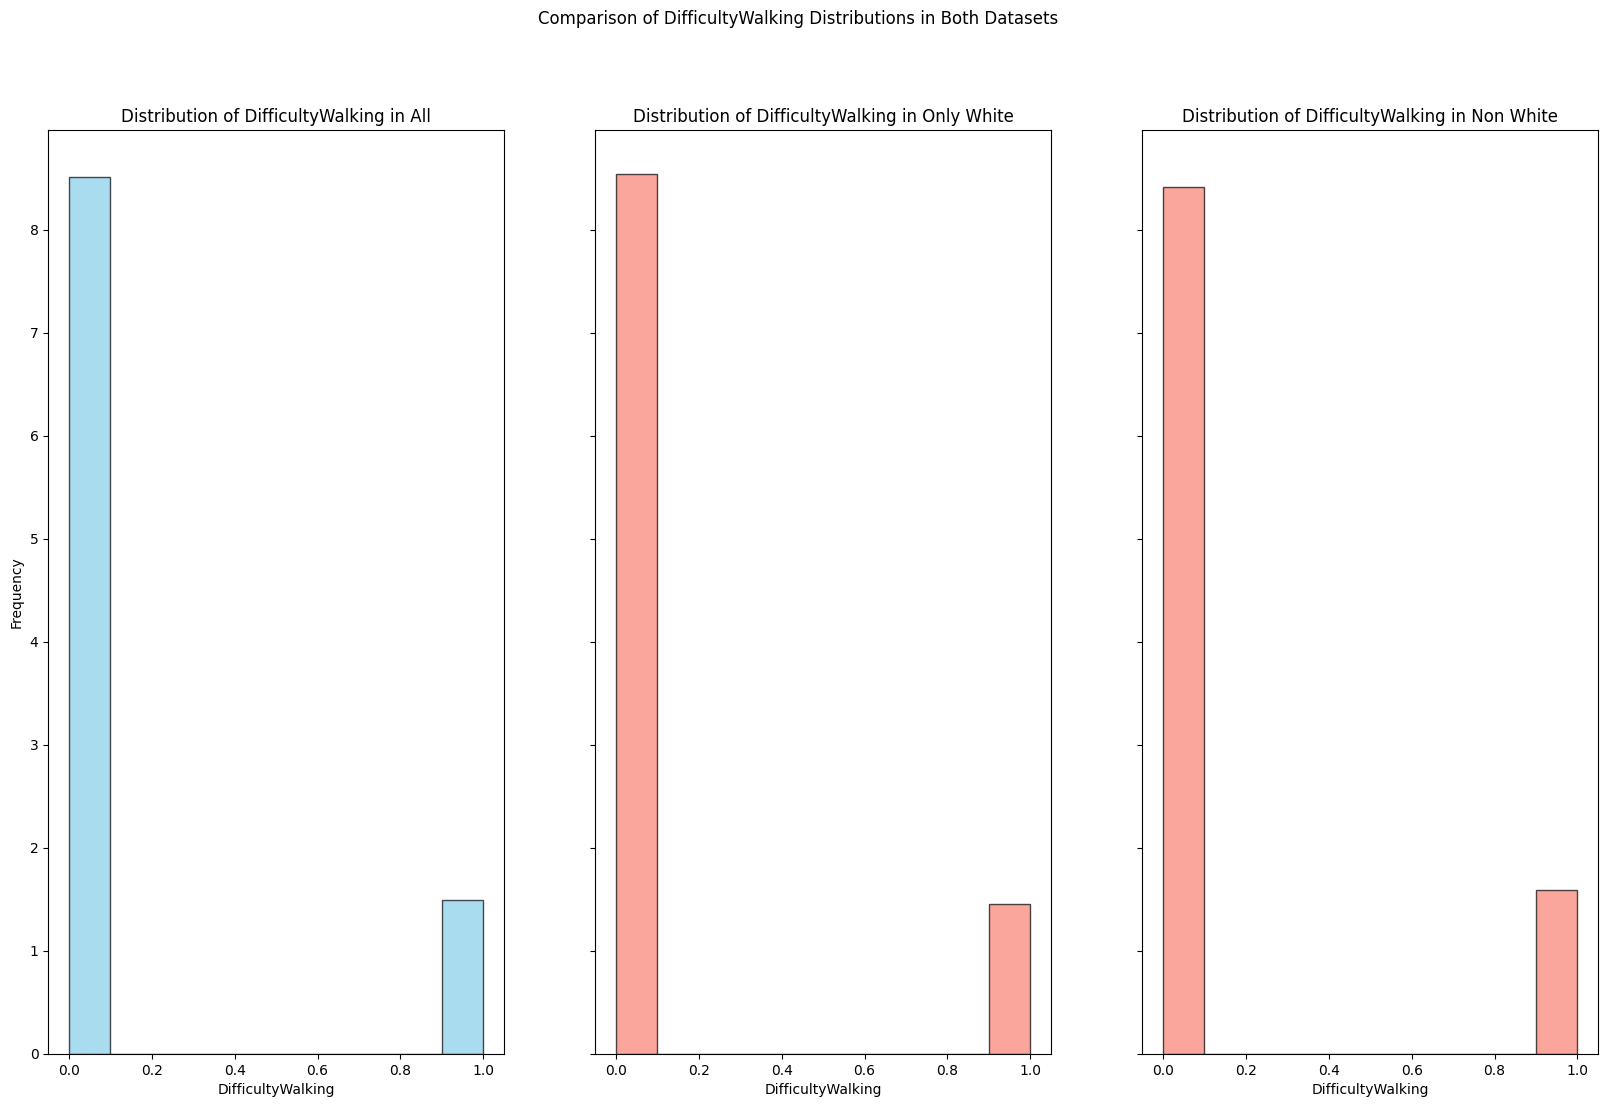

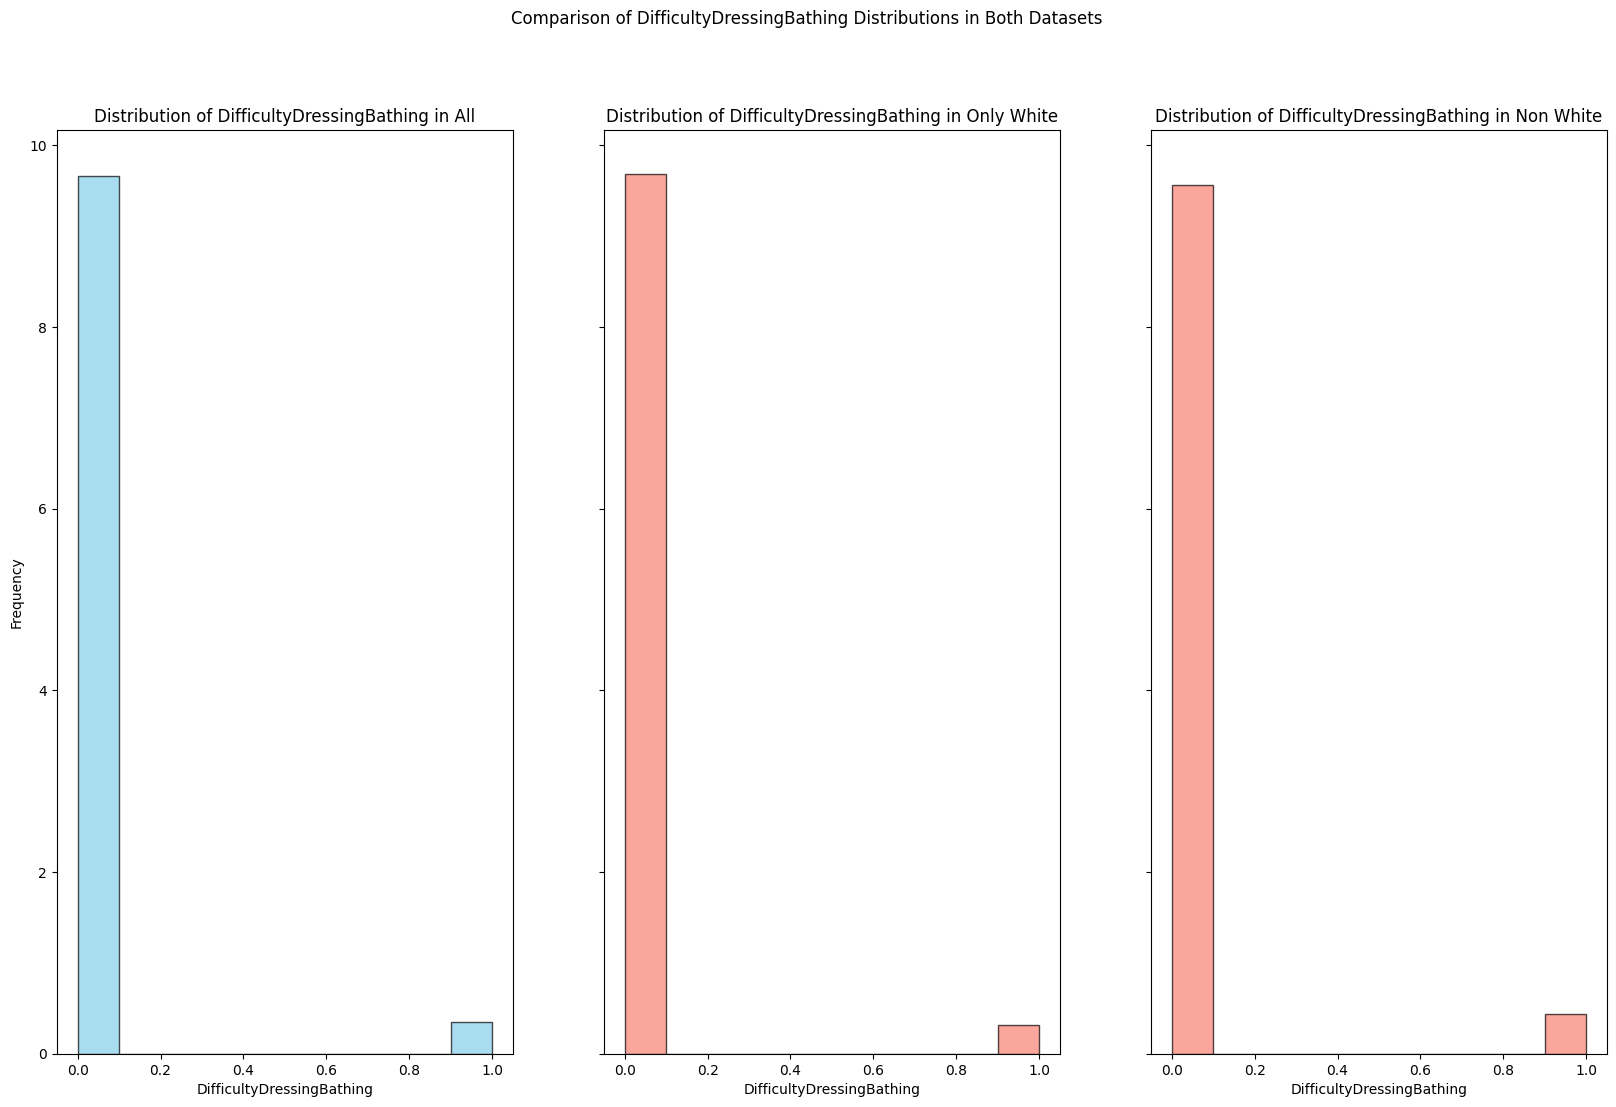

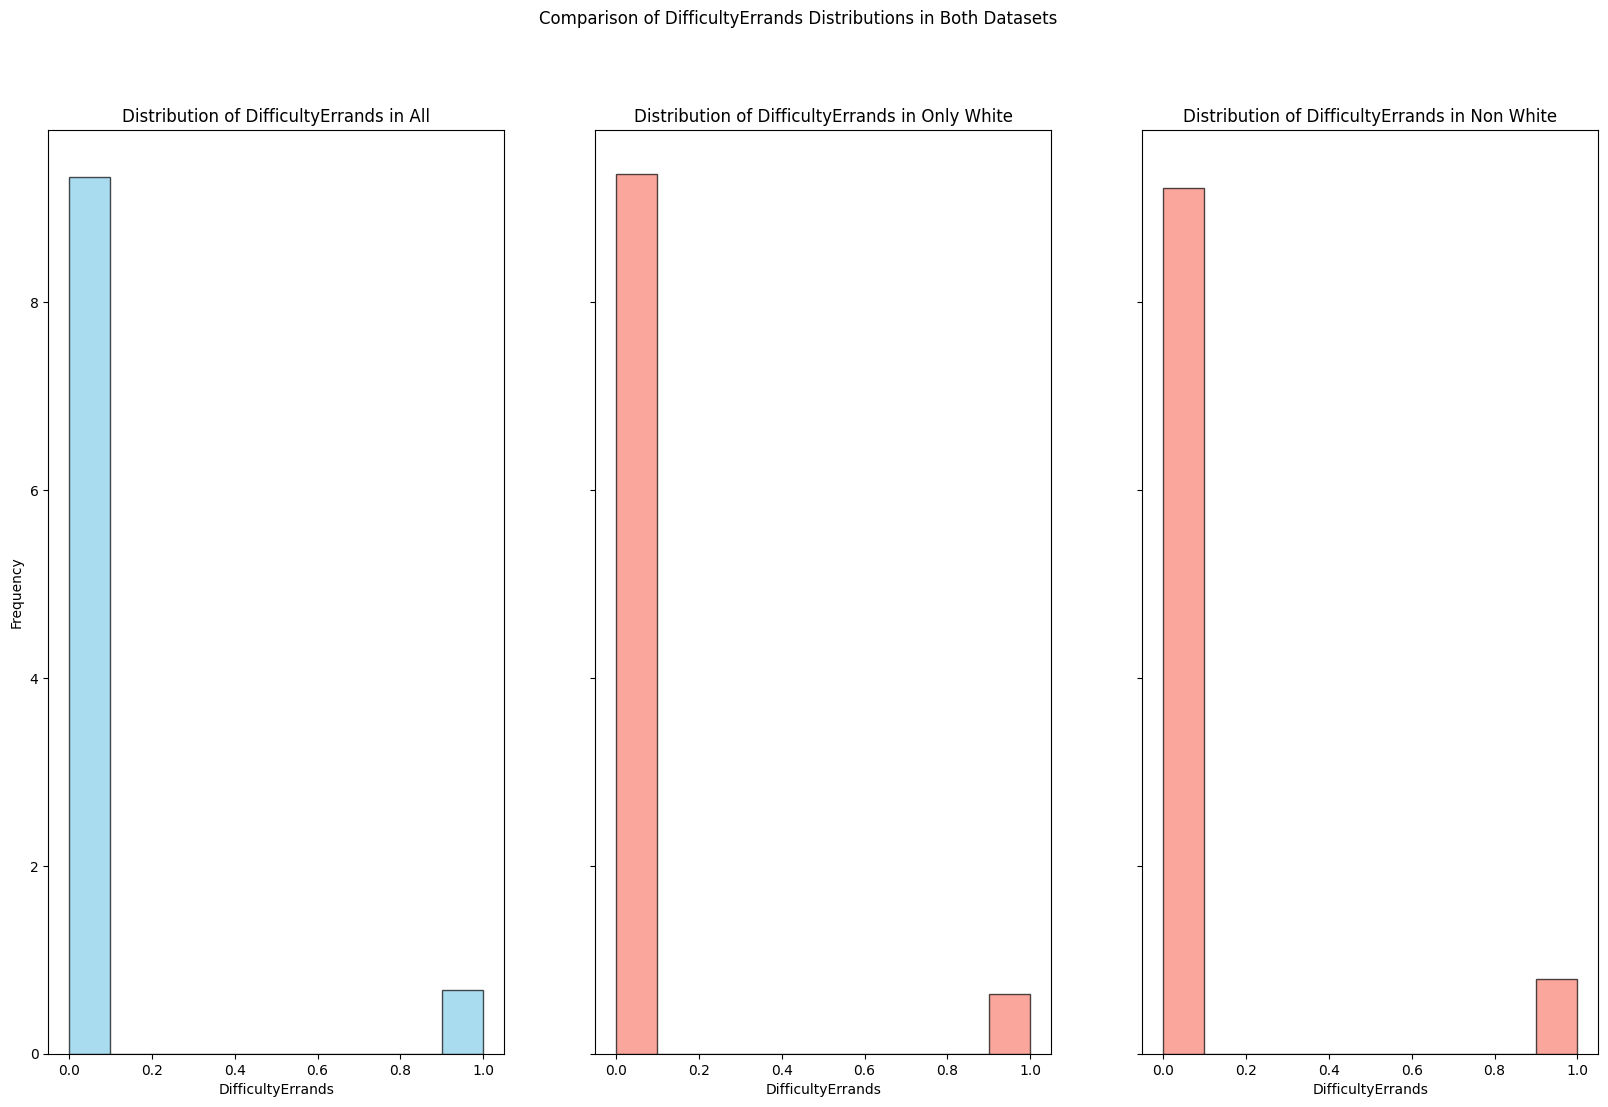

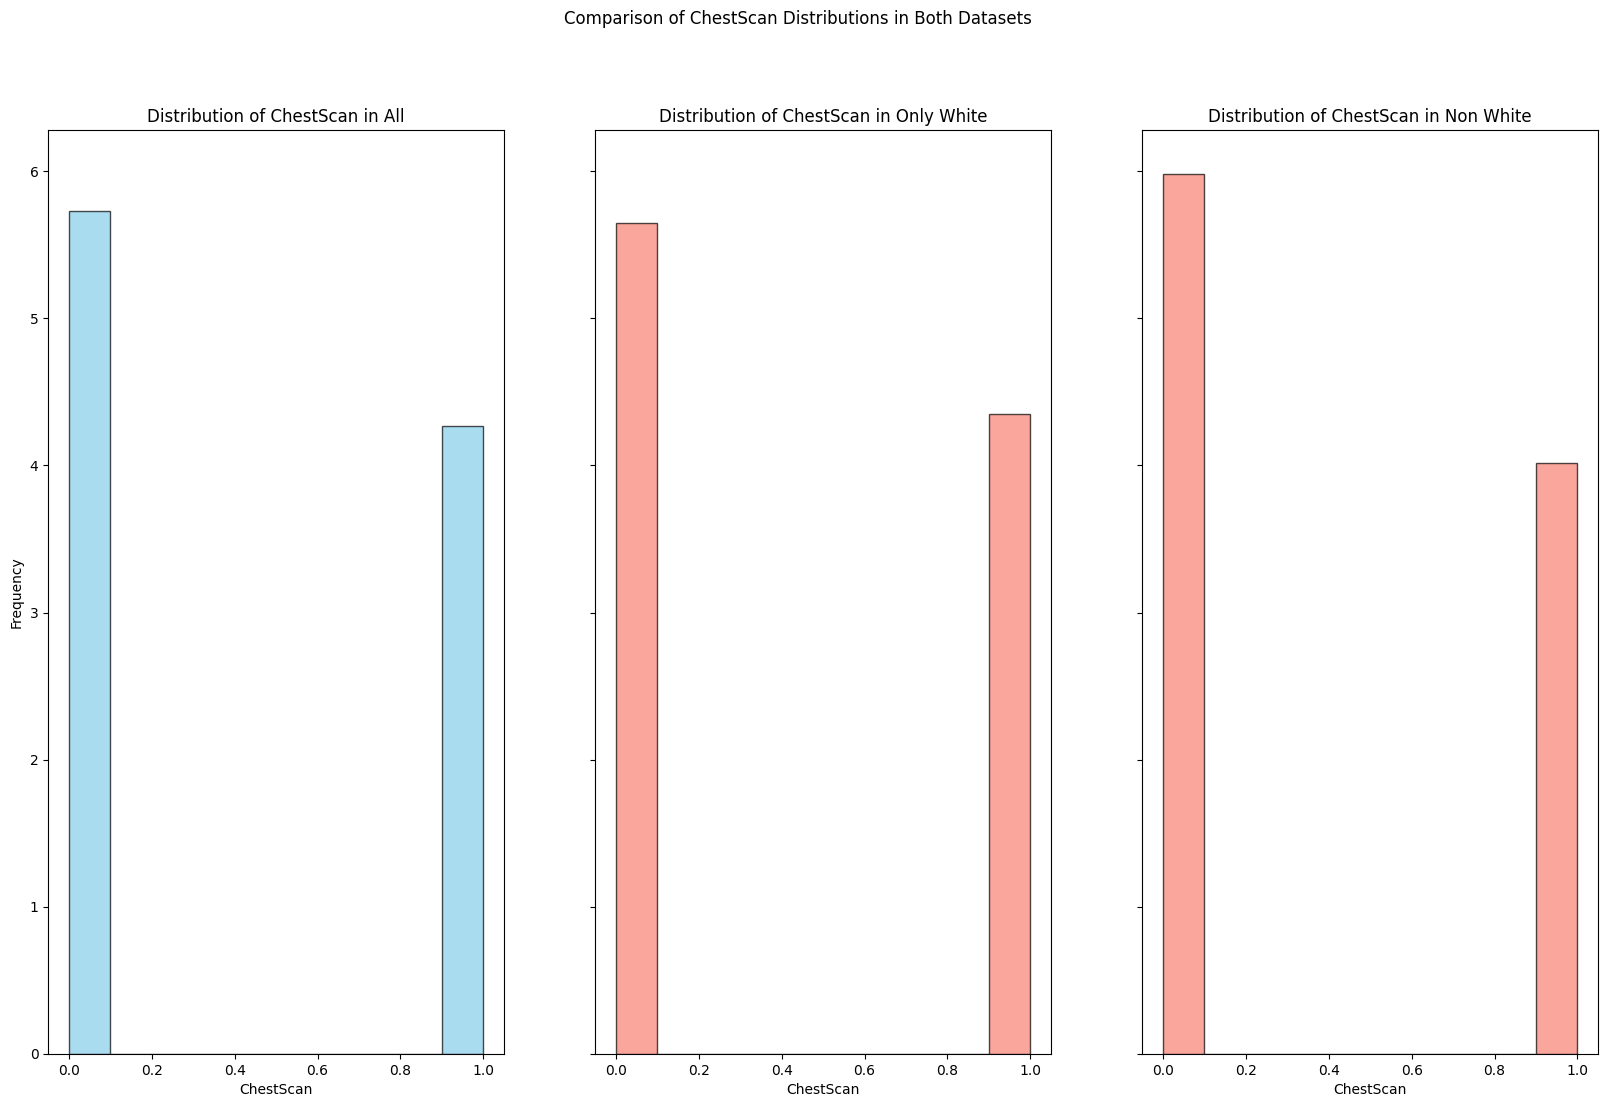

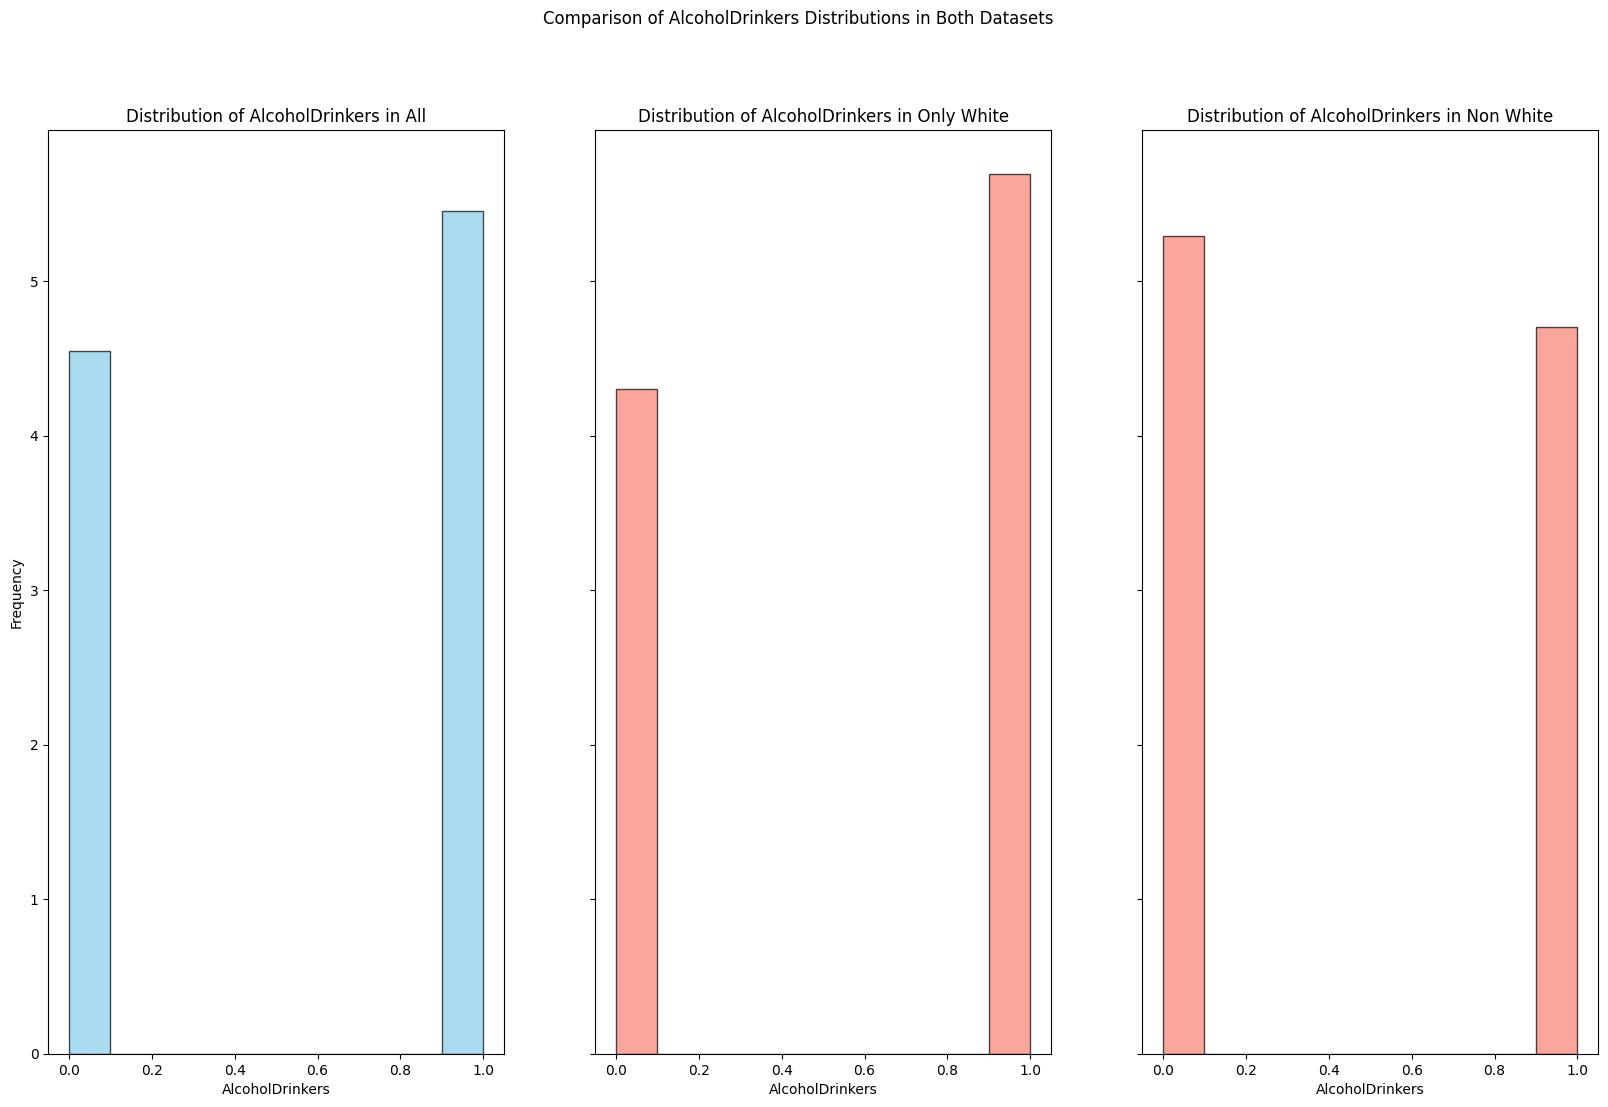

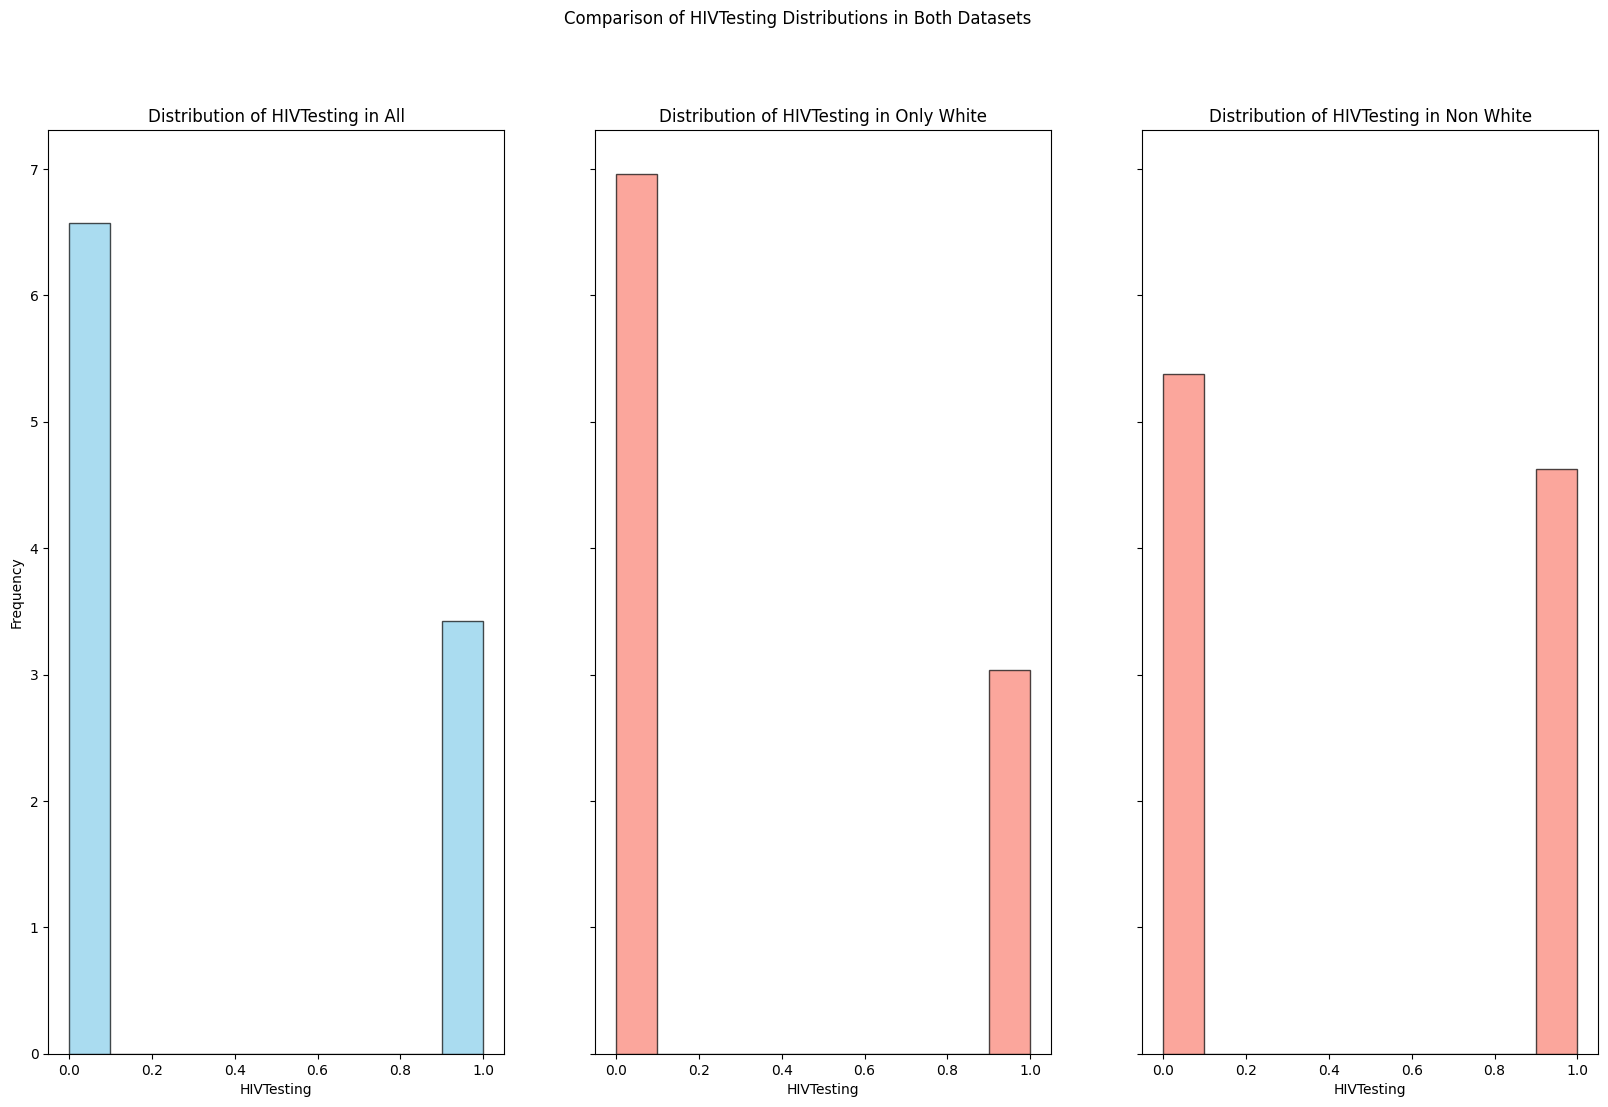

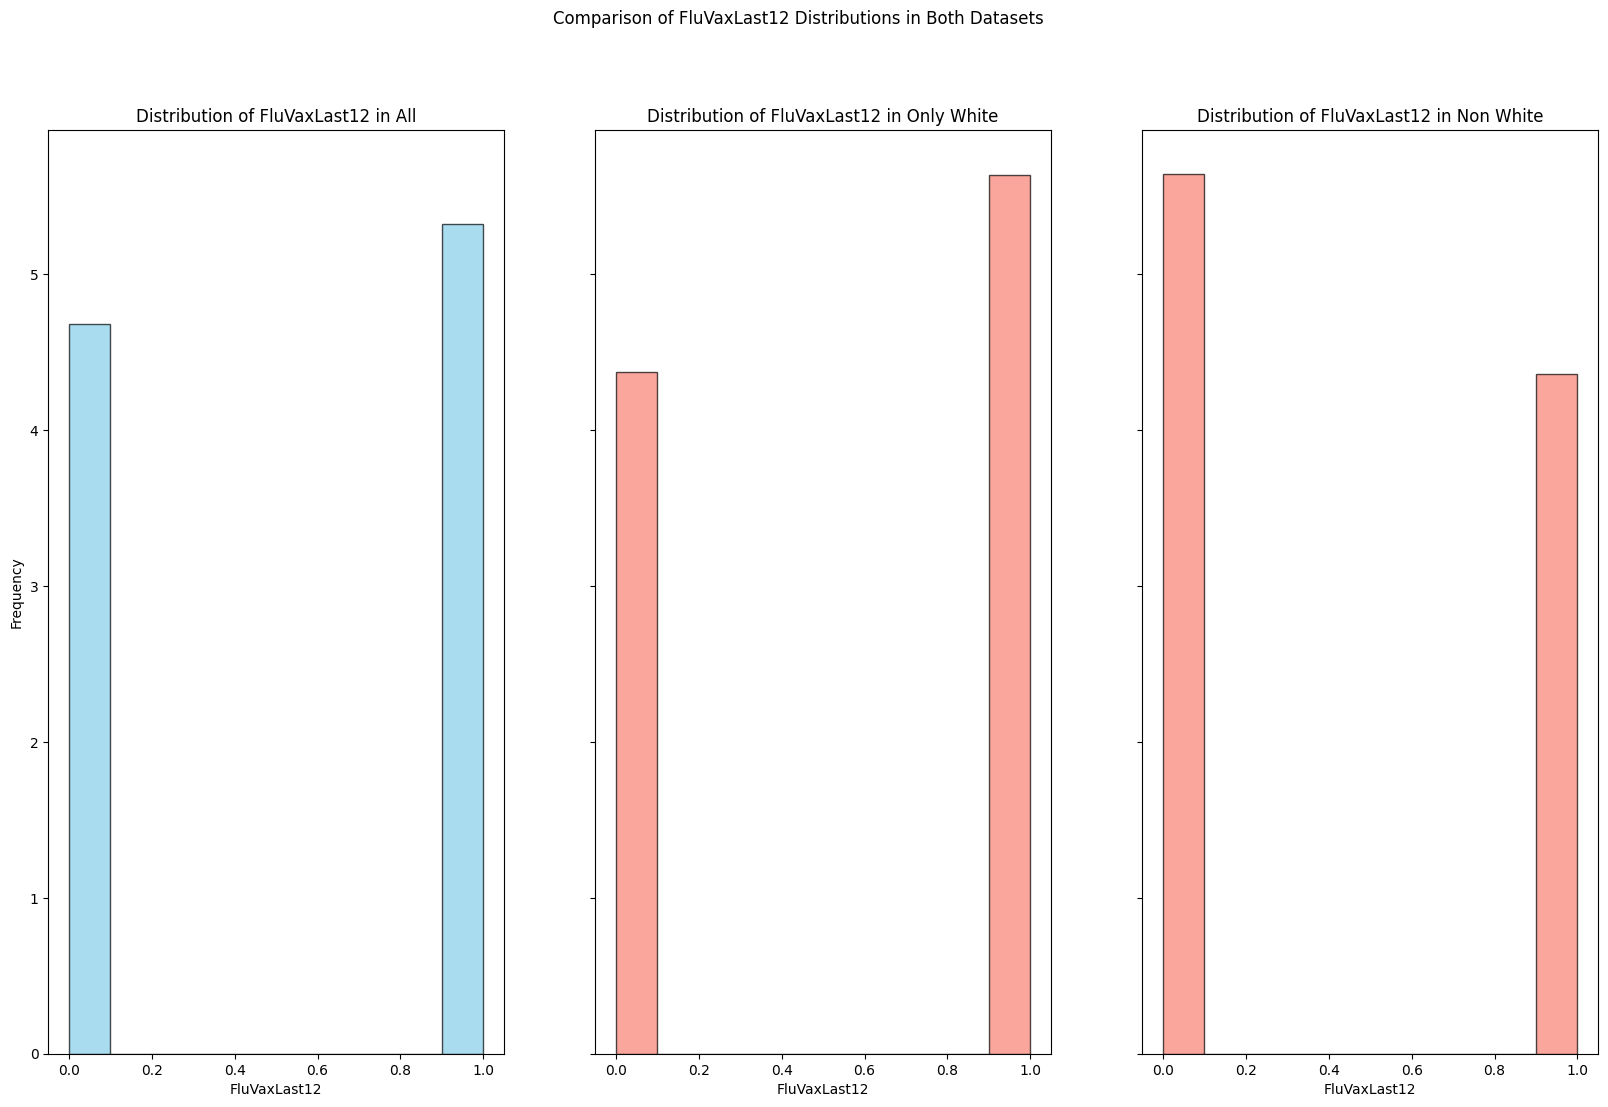

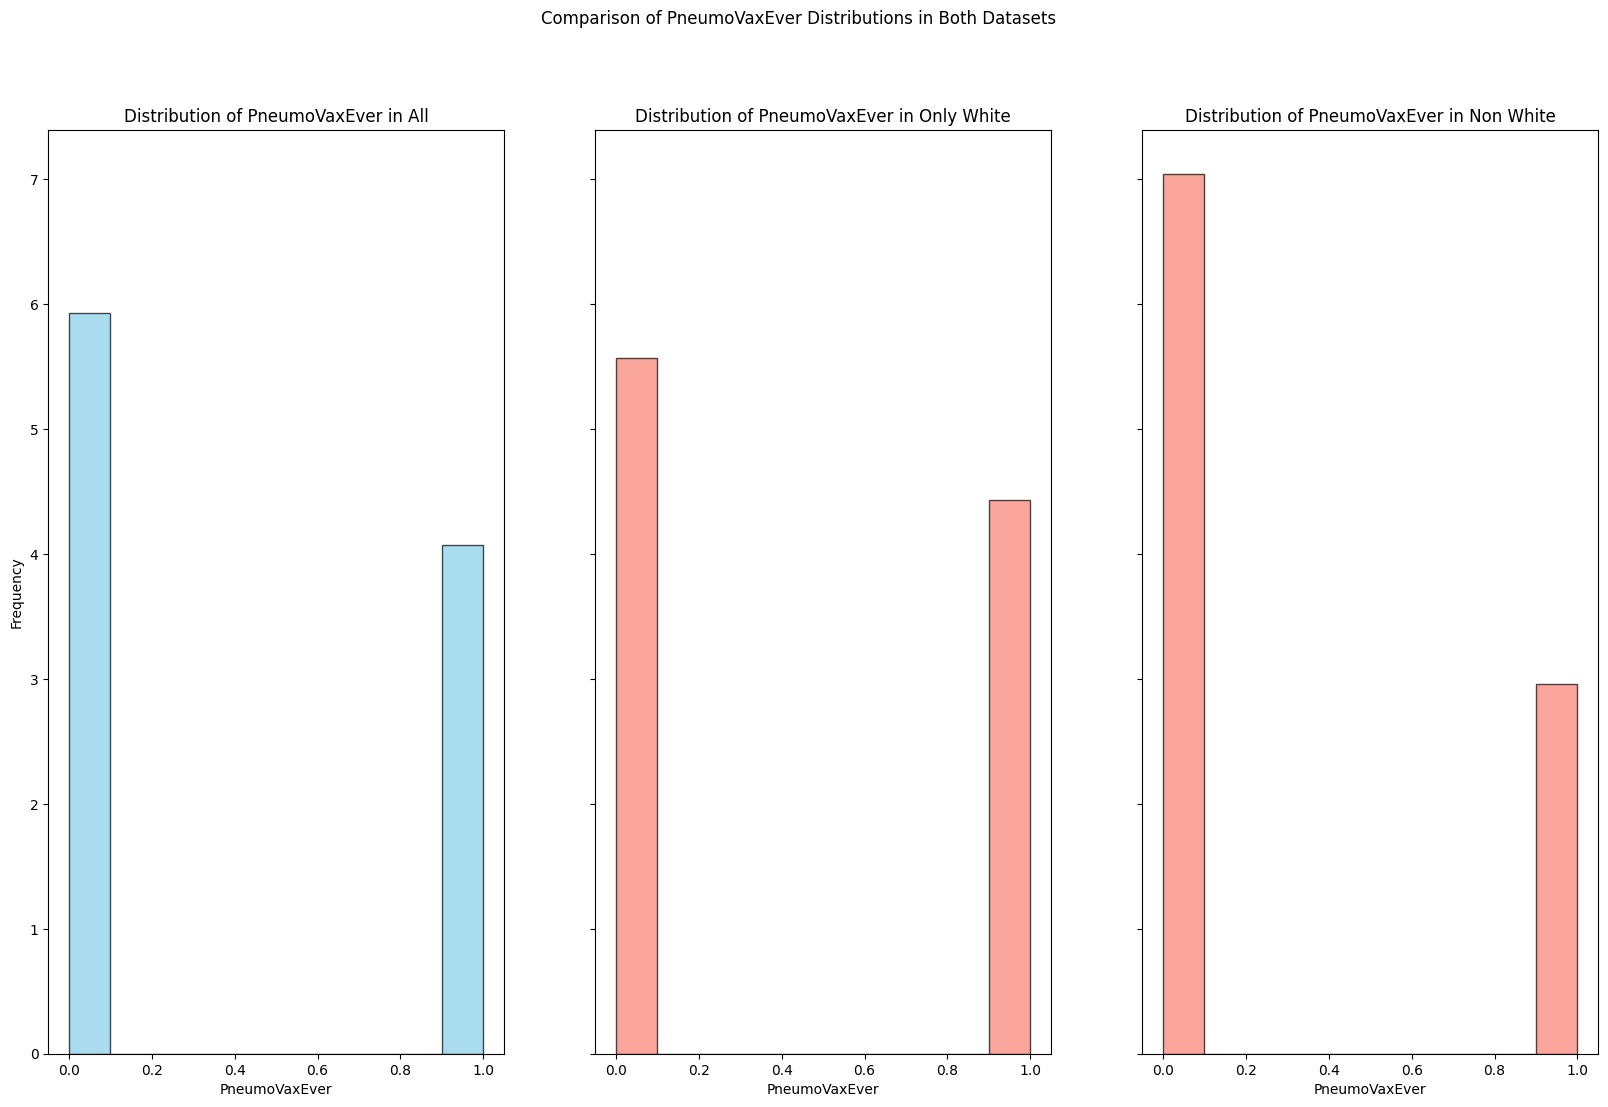

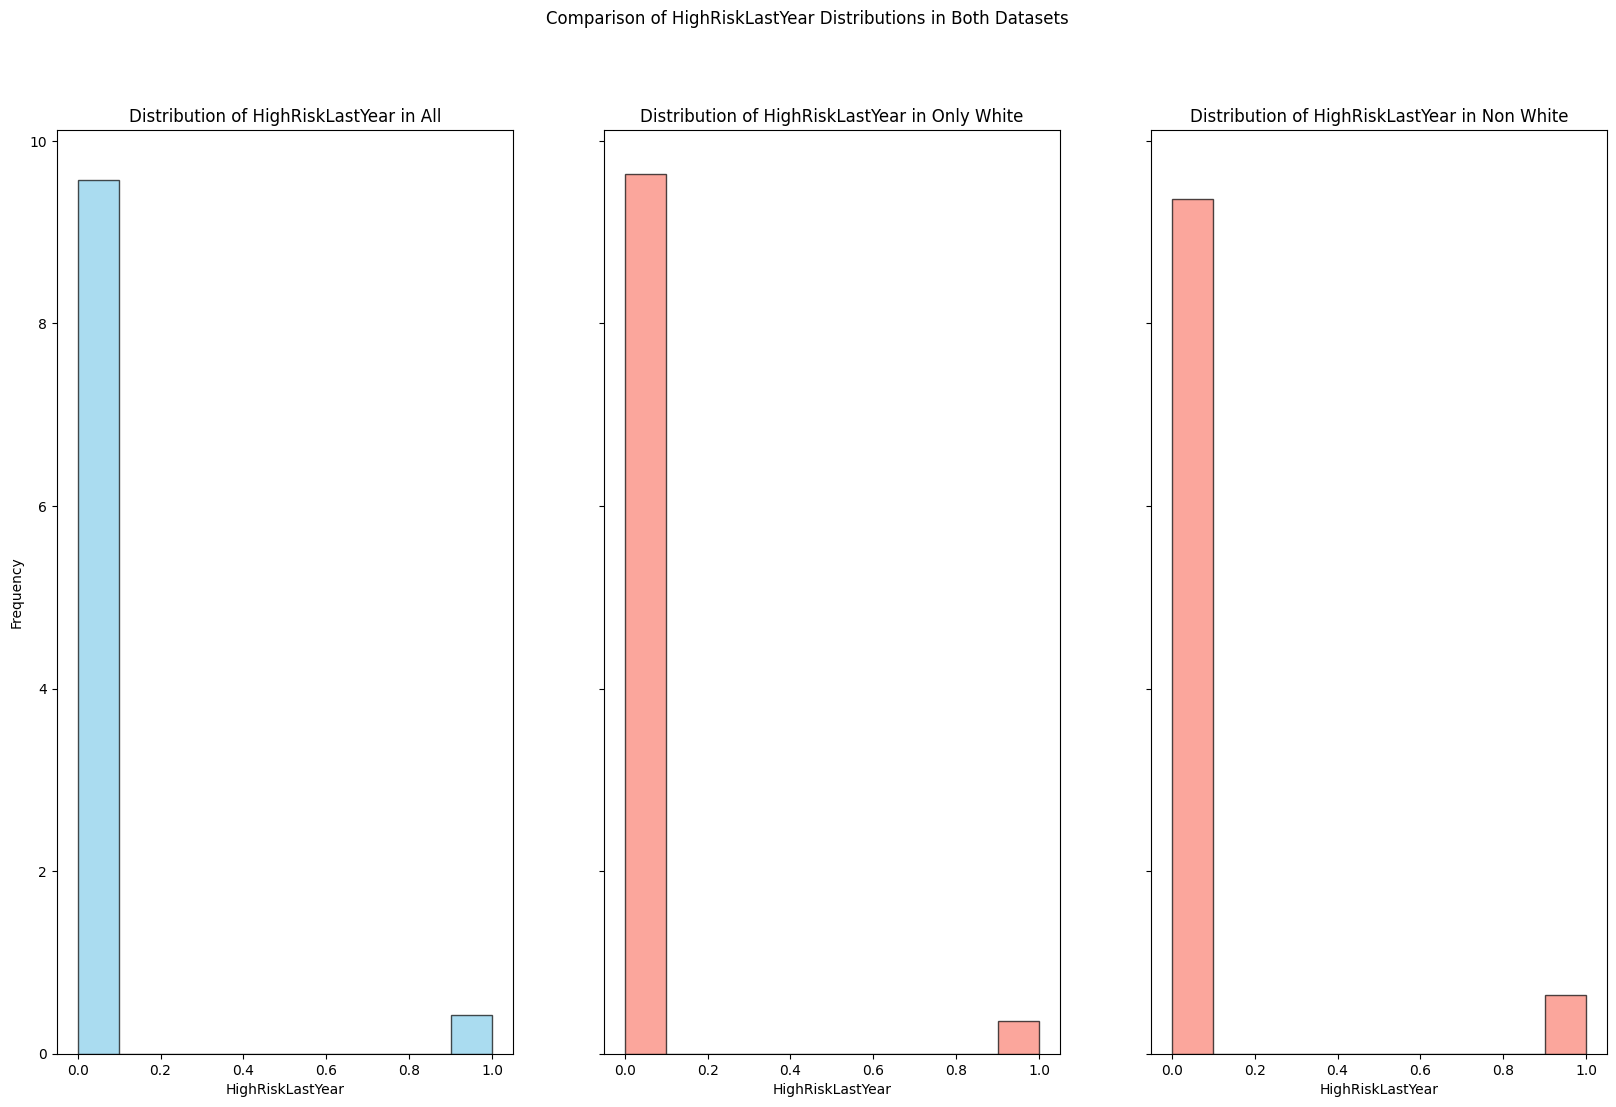

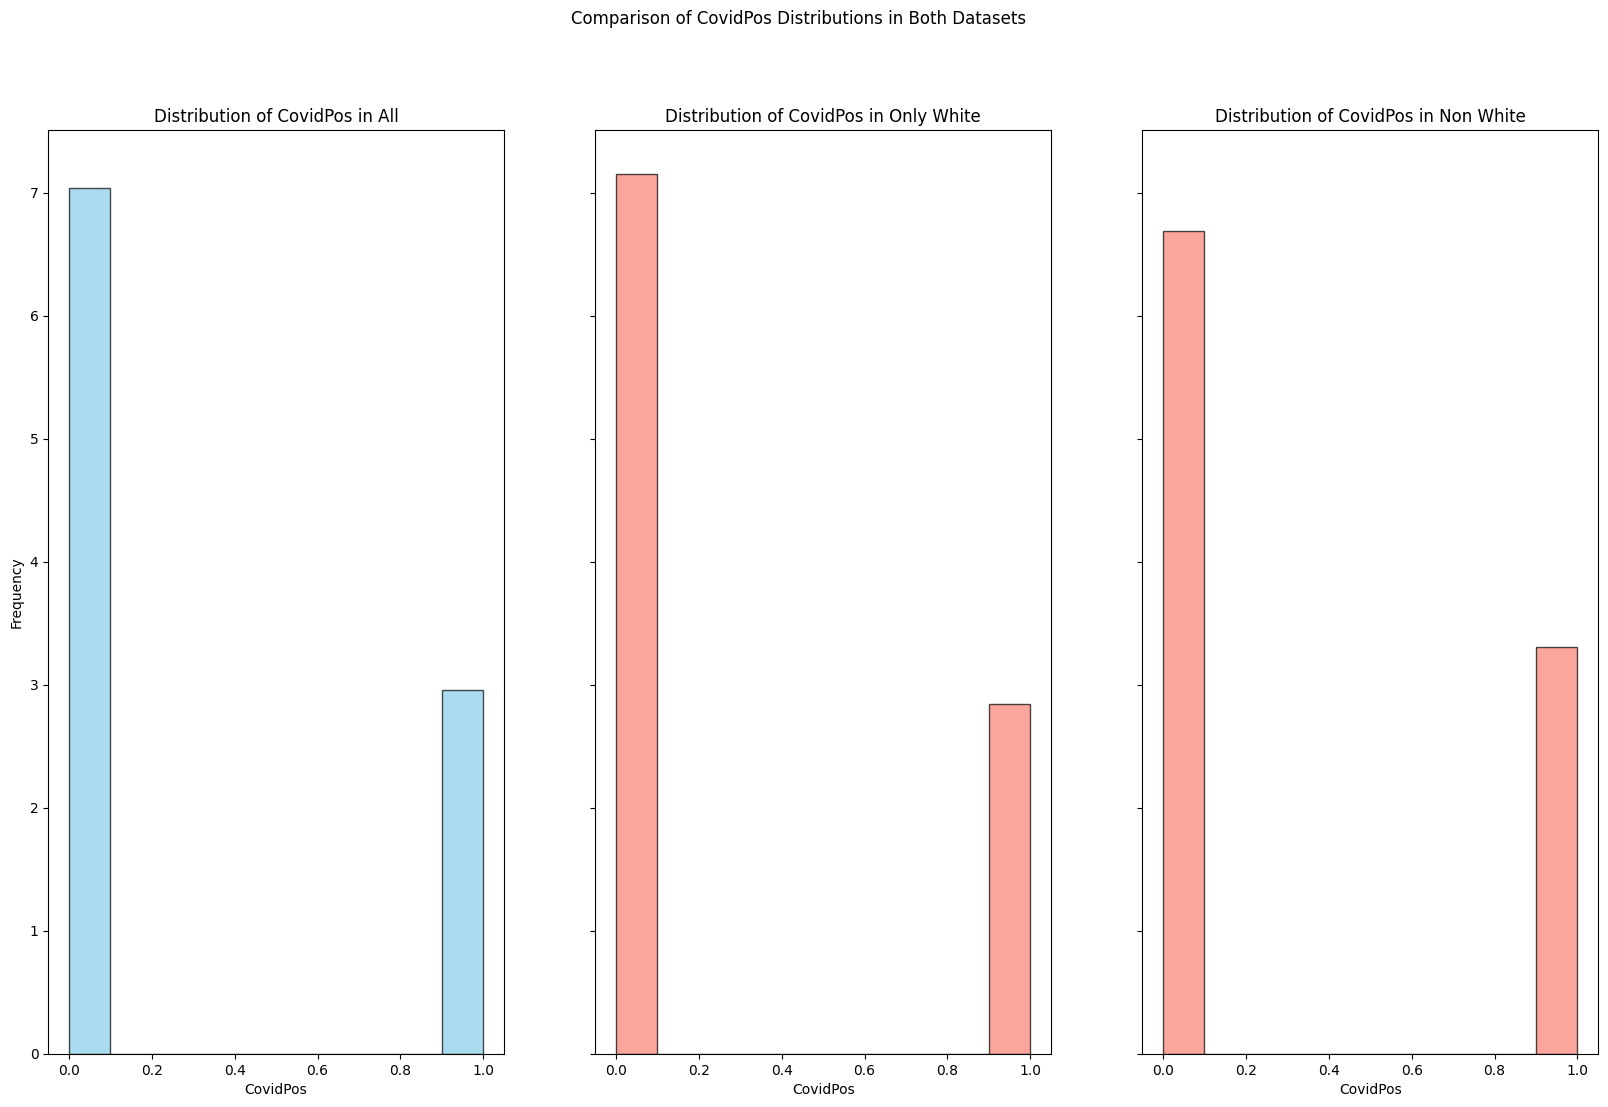

In [14]:
hist_plot_compare([data,"All"],[data_w,"Only White"],[data_nw,"Non White"],num_col[1:])

We can infer that the overrepresentation of White individuals does not significantly impact the distribution of numerical variables. Therefore, we conclude that there is no apparent bias related to the representation of White individuals in the dataset.



## Statistical Significance Tests with "HighRiskLastYear"

### 1. Correlation Matrix
To begin our analysis, we examine the correlation matrix to identify any variables with strong linear relationships to **HighRiskLastYear**. 



In [16]:
tmp = data.copy()

In [17]:
def create_mapping(column, dataset):
    unique_values = dataset[column].unique()
    return {value: idx for idx, value in enumerate(unique_values)}

cat_col = tmp.select_dtypes("object").columns




for col in cat_col:
    mapping = create_mapping(col, tmp)
    
    tmp[col] = tmp[col].replace(mapping).astype("int64")

/tmp/ipykernel_30/3431493401.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmp[col] = tmp[col].replace(mapping).astype("int64")
/tmp/ipykernel_30/3431493401.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmp[col] = tmp[col].replace(mapping).astype("int64")
/tmp/ipykernel_30/3431493401.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_

In [72]:
corr_mat

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
PatientID,1.000000,0.727302,-0.005355,-0.004532,0.002955,-0.005221,0.011227,0.016123,-0.004272,-0.002432,...,-0.016520,-0.015442,0.026156,-0.009471,-0.003736,-0.005535,-0.001748,-0.000775,-0.008594,-0.002601
State,0.727302,1.000000,-0.013162,-0.002582,0.000860,-0.018114,0.005850,0.016774,0.001770,0.000882,...,-0.019060,-0.005992,0.031610,-0.020635,-0.003570,-0.004653,-0.007183,-0.005617,-0.005928,0.000832
Sex,-0.005355,-0.013162,1.000000,0.012632,0.032758,0.693015,0.348601,0.007122,0.073293,0.064919,...,0.049543,0.054945,-0.003218,0.095258,-0.012279,-0.067359,-0.063025,0.063263,0.049662,-0.017912
GeneralHealth,-0.004532,-0.002582,0.012632,1.000000,-0.001243,0.005239,0.030309,0.031243,0.023561,0.022718,...,0.005736,0.027764,0.011238,-0.031801,0.004387,-0.004577,0.008510,-0.004885,0.000408,0.003815
AgeCategory,0.002955,0.000860,0.032758,-0.001243,1.000000,0.069640,0.043195,0.012051,-0.128818,-0.149015,...,0.211980,-0.202396,0.182056,0.084294,0.192508,-0.226683,-0.344996,-0.031977,0.156481,0.145841
HeightInMeters,-0.005221,-0.018114,0.693015,0.005239,0.069640,1.000000,0.473425,-0.026947,0.023305,0.019343,...,0.049357,0.023824,-0.132594,0.124474,0.019537,-0.057870,-0.081086,0.066113,0.048157,0.014524
WeightInKilograms,0.011227,0.005850,0.348601,0.030309,0.043195,0.473425,1.000000,0.859318,0.038411,0.045554,...,0.014224,0.075132,-0.045295,0.001145,0.045627,-0.030045,-0.029485,0.045254,0.011872,0.068691
BMI,0.016123,0.016774,0.007122,0.031243,0.012051,-0.026947,0.859318,1.000000,0.030210,0.040154,...,-0.009059,0.071031,0.024758,-0.069438,0.044312,-0.002777,0.011127,0.013592,-0.010578,0.070297
HadHeartAttack,-0.004272,0.001770,0.073293,0.023561,-0.128818,0.023305,0.038411,0.030210,1.000000,0.446480,...,-0.016950,0.168255,-0.024741,-0.073692,-0.013894,0.046403,0.120133,0.010978,-0.021262,-0.019387
HadAngina,-0.002432,0.000882,0.064919,0.022718,-0.149015,0.019343,0.045554,0.040154,0.446480,1.000000,...,-0.030554,0.184711,-0.042967,-0.066952,-0.023515,0.076770,0.157861,0.017203,-0.027592,-0.016221


In [21]:
corr_mat = tmp.corr()
high_corr = corr_mat["HighRiskLastYear"][abs(corr_mat["HighRiskLastYear"]) > 0.1].drop("HighRiskLastYear")
high_corr 

AgeCategory        0.156481
ECigaretteUsage    0.166718
HIVTesting         0.131899
Name: HighRiskLastYear, dtype: float64

The matrix shows that no variable has a high correlation with the target variable, suggesting that further statistical tests are necessary to assess feature significance.

### 2. Statistical Tests
Given the lack of high correlation, we proceed with the following tests:
- **Chi-squared Test**: To assess the association between categorical variables and **HighRiskLastYear**.
- **T-Test**: To evaluate the significance of mean differences for scalar variables concerning **HighRiskLastYear**.

These tests will help us identify variables that may have significant relationships with heart attack risk.


In [22]:
def chi_square_test(df, cat_var, target):
    contingency_table = pd.crosstab(df[cat_var], df[target])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return chi2, p, dof, expected

def chi_square_for_cat(df,cat_col,target):
    
    for col in cat_col:
        chi2, p, dof, expected = chi_square_test(df, col, target)
        
        print(f"########{col}#########")
        
        print("Chi-Square Test:")
        print(f"Chi2 Statistic: {chi2}")
        print(f"P-Value: {p}")
        print(f"Degrees of Freedom: {dof}")
        
        print(f"########{col}#########")
        print("")
        

In [23]:
chi_square_for_cat(data,cat_col[1:],"HighRiskLastYear")

########Sex#########
Chi-Square Test:
Chi2 Statistic: 585.5698255818627
P-Value: 2.3043061869447993e-129
Degrees of Freedom: 1
########Sex#########

########GeneralHealth#########
Chi-Square Test:
Chi2 Statistic: 27.534874353440784
P-Value: 1.549469871871129e-05
Degrees of Freedom: 4
########GeneralHealth#########

########AgeCategory#########
Chi-Square Test:
Chi2 Statistic: 10883.070188081603
P-Value: 0.0
Degrees of Freedom: 12
########AgeCategory#########

########HadDiabetes#########
Chi-Square Test:
Chi2 Statistic: 366.7352319724913
P-Value: 3.5461084071708446e-79
Degrees of Freedom: 3
########HadDiabetes#########

########SmokerStatus#########
Chi-Square Test:
Chi2 Statistic: 1209.4275966312296
P-Value: 6.602720384432868e-262
Degrees of Freedom: 3
########SmokerStatus#########

########ECigaretteUsage#########
Chi-Square Test:
Chi2 Statistic: 6692.573529815796
P-Value: 0.0
Degrees of Freedom: 3
########ECigaretteUsage#########

########RaceEthnicityCategory#########
Chi-Square Te

**Low P-Values**: Each test has a p-value well below typical significance levels (e.g., 0.05). This suggests a significant association between each categorical variable and the target variable, indicating potential influence or bias.

**Chi-Square Statistic:** The higher the chi-square value, the stronger the observed difference between expected and actual values. For example, **ECigaretteUsage** and **AgeCategory** have particularly high chi-square statistics, indicating a substantial deviation from what would be expected if there were no association with the target.


**Lets dive deeper**

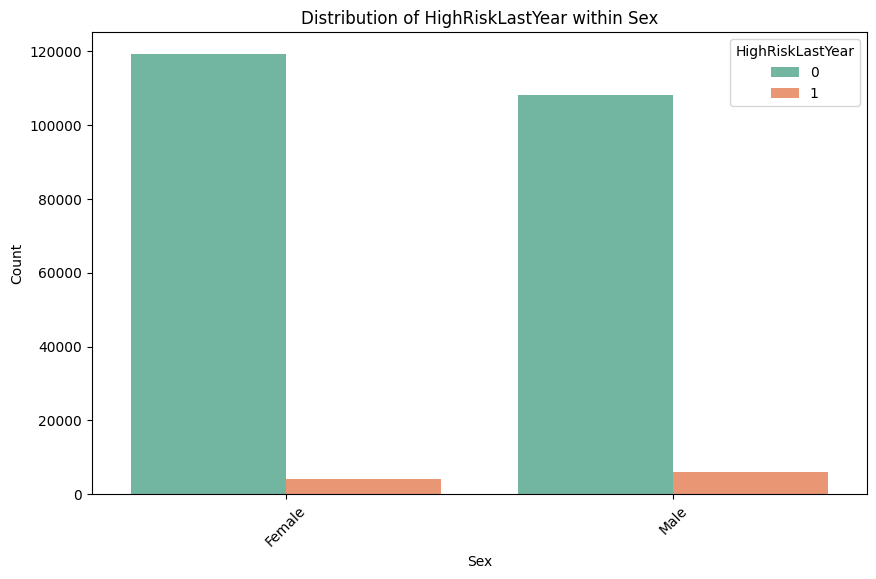

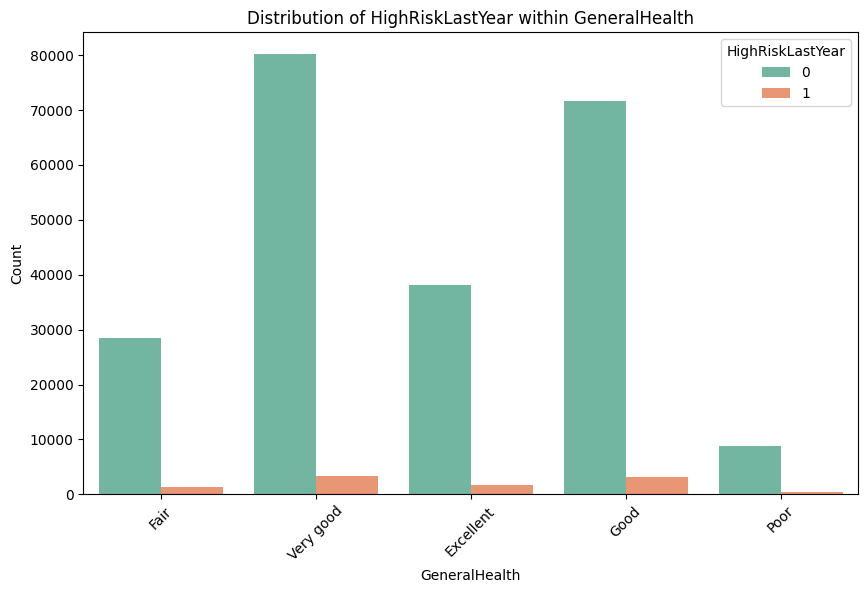

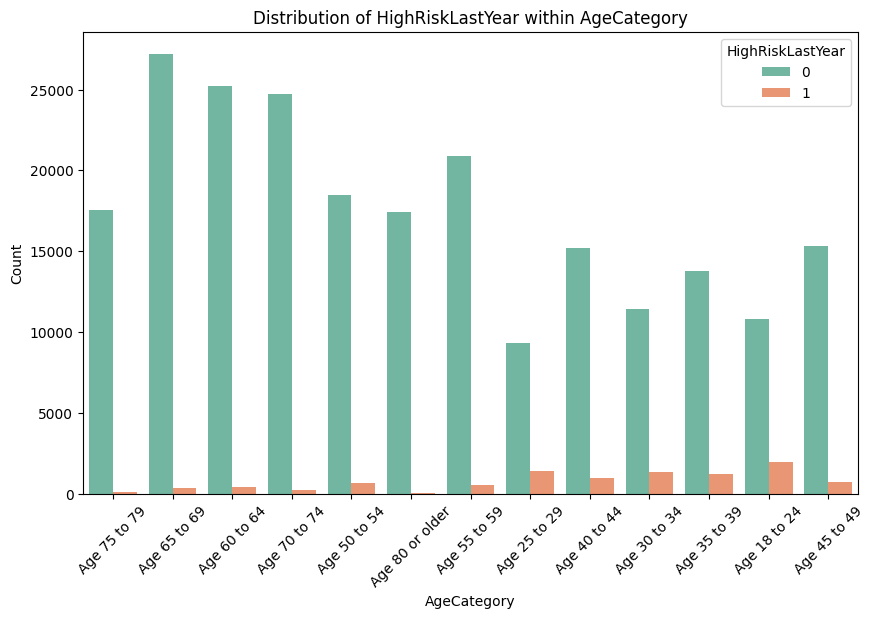

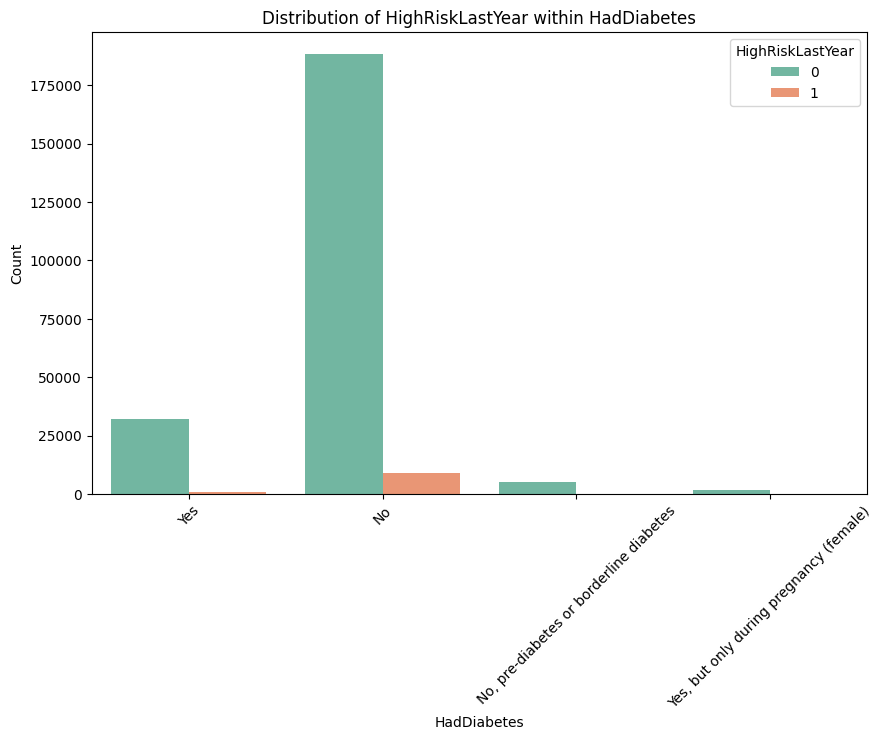

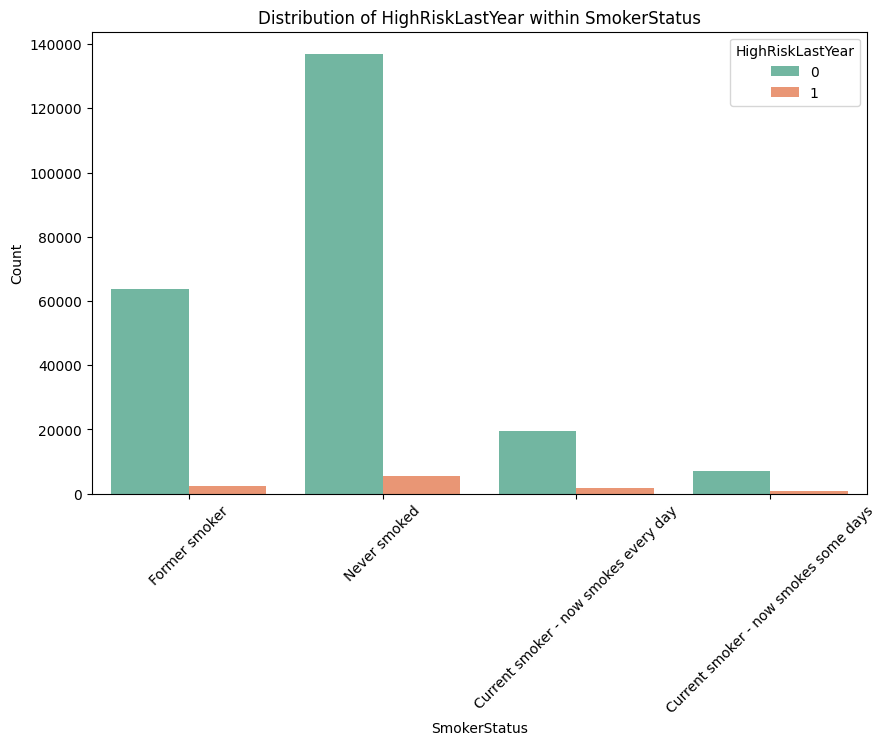

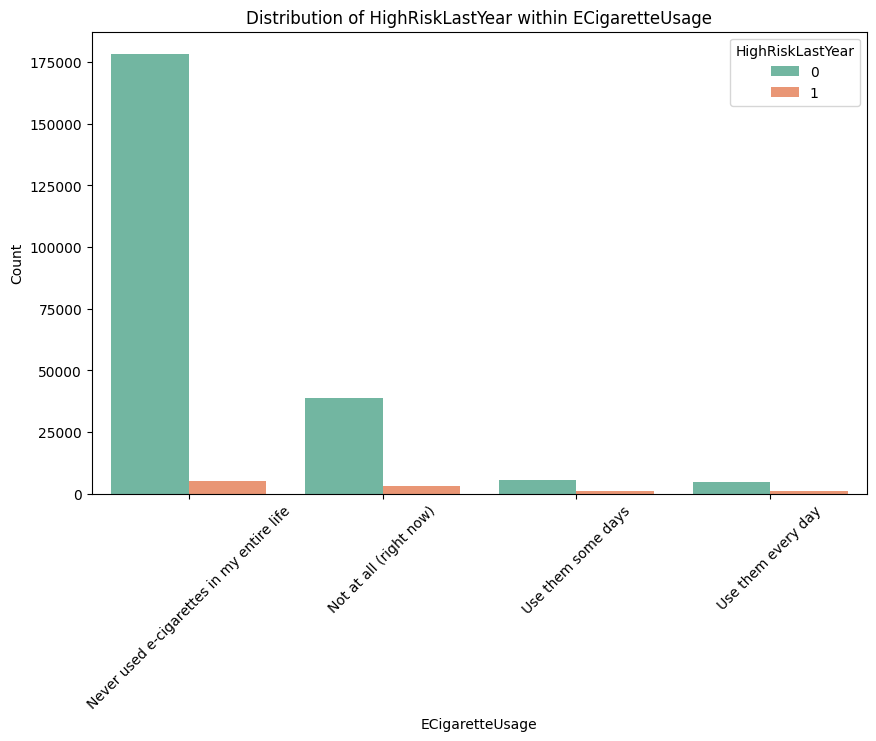

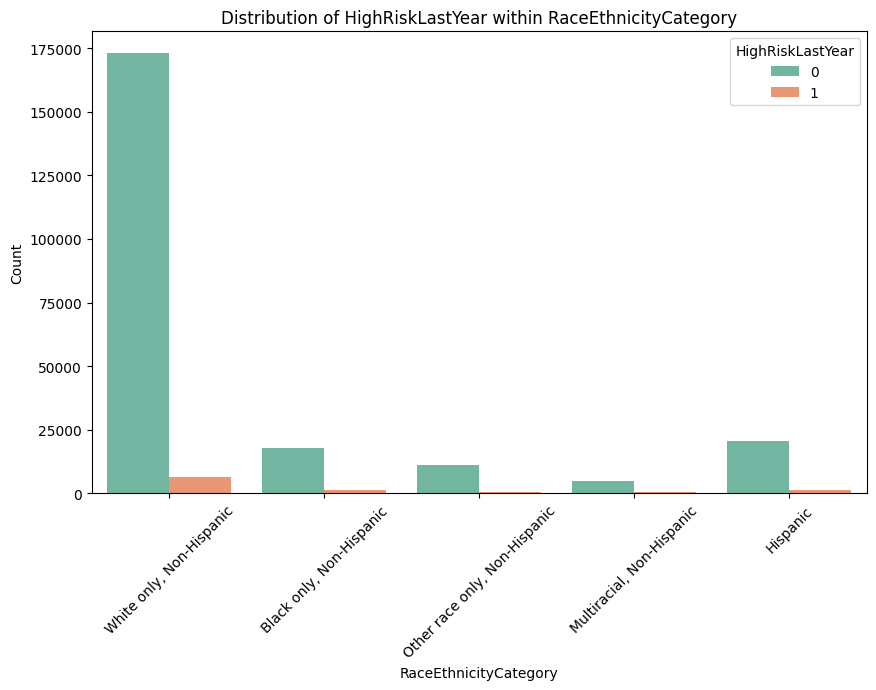

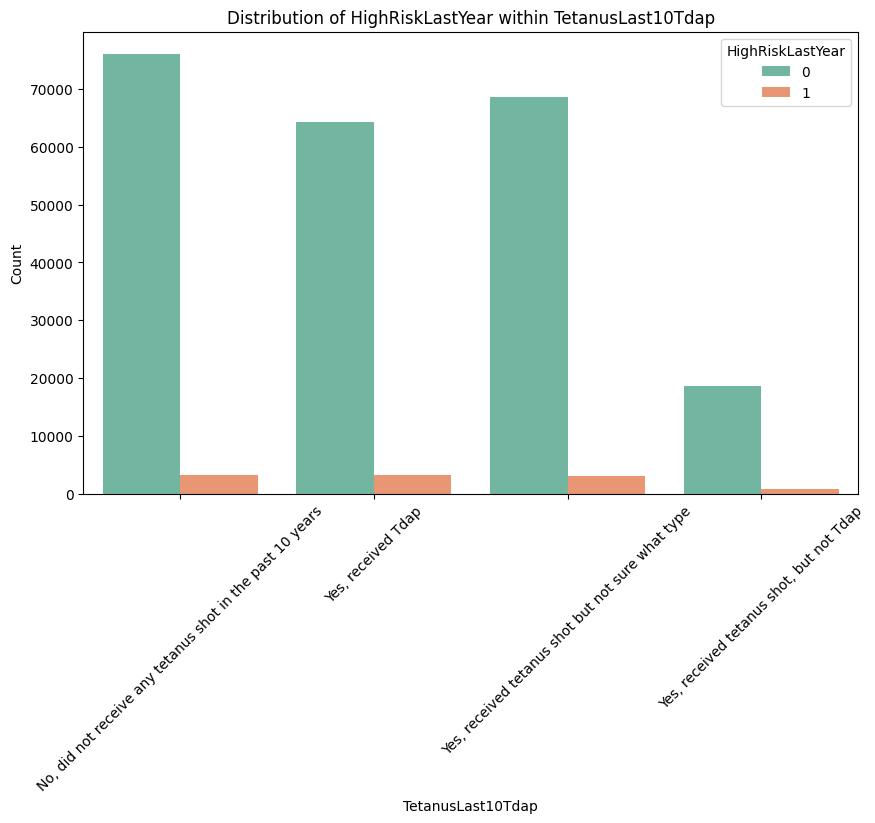

In [24]:
for col in cat_col[1:]:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue="HighRiskLastYear", data=data, palette="Set2")
    plt.title(f"Distribution of HighRiskLastYear within {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="HighRiskLastYear", loc="upper right")
    plt.xticks(rotation=45)
    plt.show()


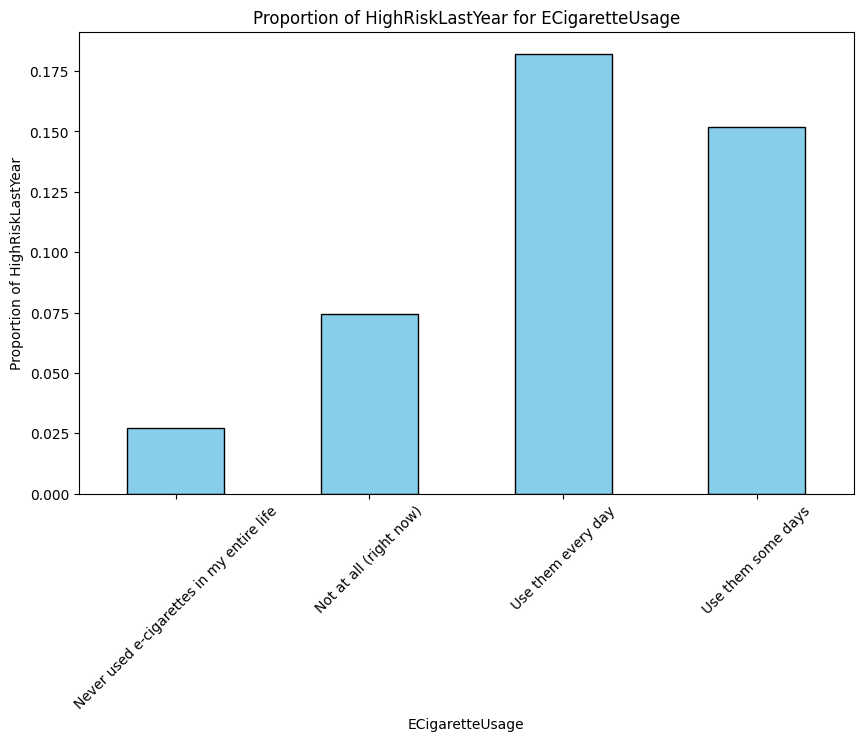

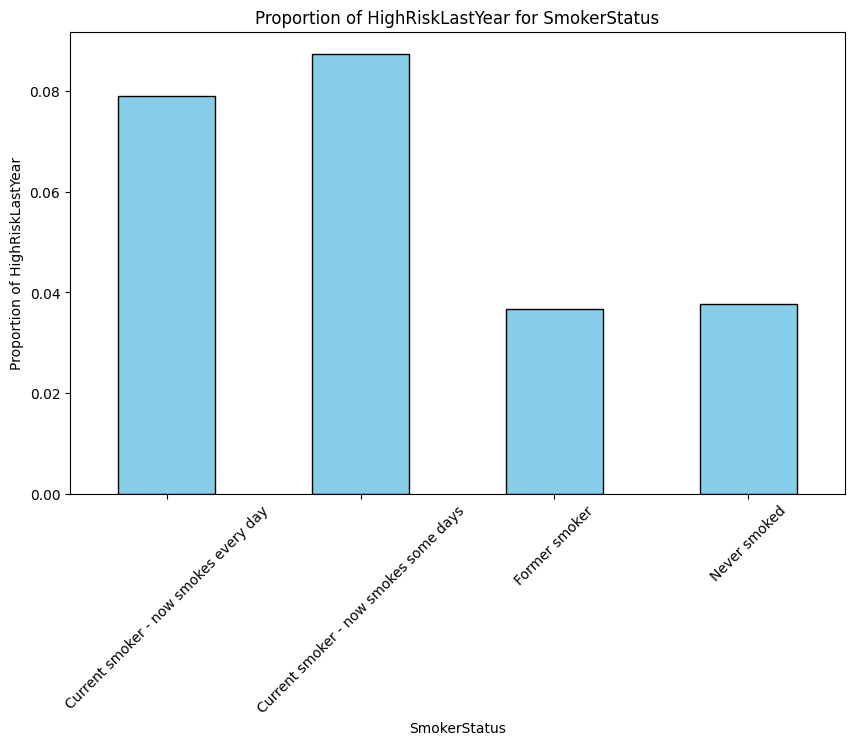

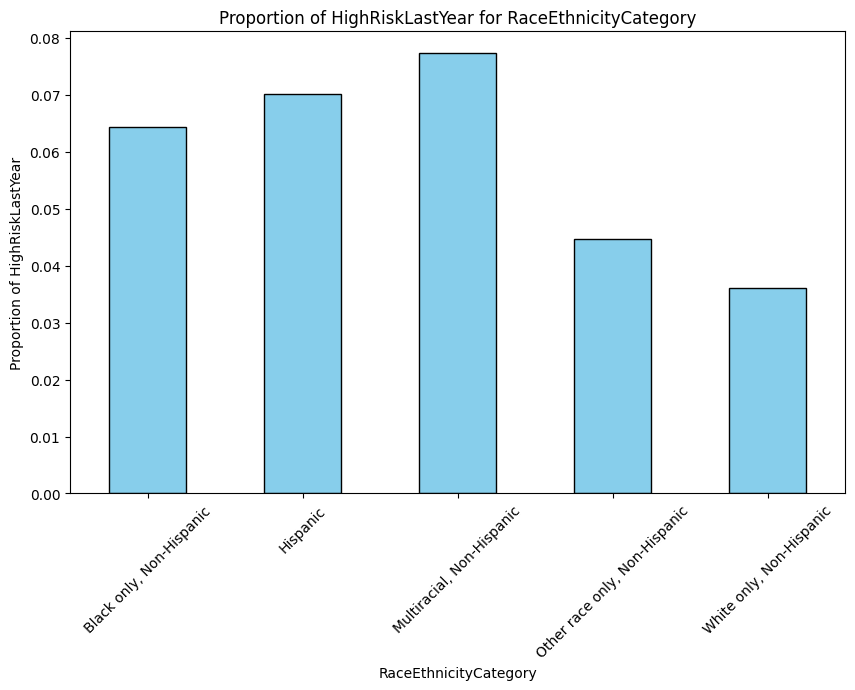

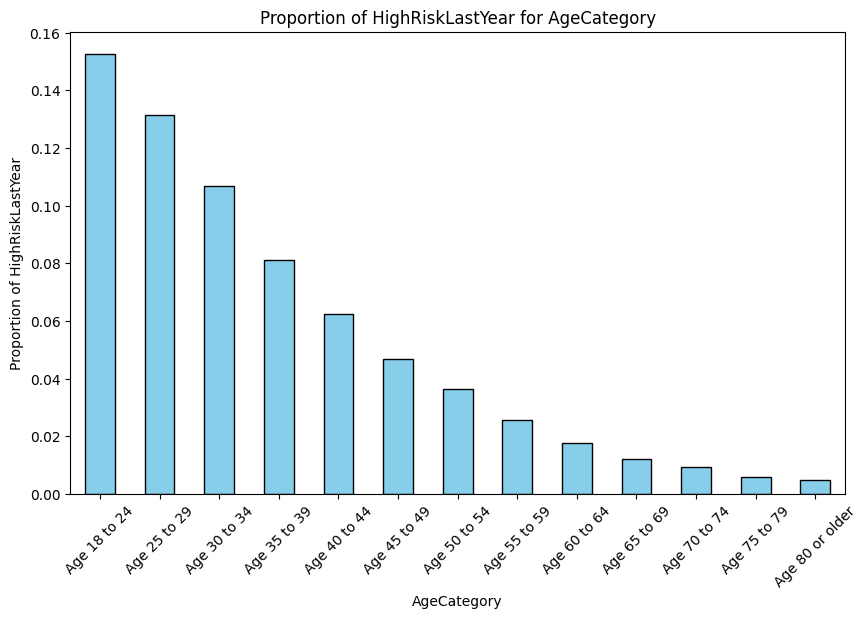

In [25]:
sensitive_vars = ['ECigaretteUsage','SmokerStatus','RaceEthnicityCategory', 'AgeCategory']


for var in sensitive_vars:

    proportions = data.groupby(var)["HighRiskLastYear"].mean()  
    
    plt.figure(figsize=(10, 6))
    proportions.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Proportion of HighRiskLastYear for {var}")
    plt.ylabel("Proportion of HighRiskLastYear")
    plt.xlabel(var)
    plt.xticks(rotation=45)
    plt.show()

In [26]:
def continuous_test(df, cont_var, target):
    unique_targets = df[target].unique()
    group1 = df[df[target] == unique_targets[0]][cont_var]
    group2 = df[df[target] == unique_targets[1]][cont_var]
    t_stat, p_val = stats.ttest_ind(group1, group2)
    return t_stat, p_val

In [27]:
def T_square_for_num(df,num_col,target):
    
    for col in num_col:
        if col == "HighRiskLastYear":
            pass
        else:
            t_stat, p_val = continuous_test(df, col, target)

            print(f"######## {col} #########")

            print("T Test:")
            print(f"T Statistic: {t_stat, p_val}")
            print(f"P-Value: { p_val}")

            print(f"######## {col} #########")
            print("")

In [28]:
T_square_for_num(data,num_col[1:],"HighRiskLastYear")

######## HeightInMeters #########
T Test:
T Statistic: (-23.502341029140098, 5.324509704220492e-122)
P-Value: 5.324509704220492e-122
######## HeightInMeters #########

######## WeightInKilograms #########
T Test:
T Statistic: (-5.787900209004904, 7.136088769924647e-09)
P-Value: 7.136088769924647e-09
######## WeightInKilograms #########

######## BMI #########
T Test:
T Statistic: (5.156846895860834, 2.5134375620541316e-07)
P-Value: 2.5134375620541316e-07
######## BMI #########

######## HadHeartAttack #########
T Test:
T Statistic: (10.366954183067215, 3.548834121152862e-25)
P-Value: 3.548834121152862e-25
######## HadHeartAttack #########

######## HadAngina #########
T Test:
T Statistic: (13.455430139505584, 2.962142928268243e-41)
P-Value: 2.962142928268243e-41
######## HadAngina #########

######## HadStroke #########
T Test:
T Statistic: (6.793893754300644, 1.0940218906721332e-11)
P-Value: 1.0940218906721332e-11
######## HadStroke #########

######## HadAsthma #########
T Test:
T St

Based on our exploratory data analysis and statistical tests, all variables show a significant relationship with **HighRiskLastYear** (p-value < 0.05). Consequently, we will retain all features for our initial model development.


In [38]:
featuresCol = num_col.to_list()
featuresCol += cat_col.to_list()

tmp = data[featuresCol]


In [39]:
def create_mapping(column, dataset):
    unique_values = dataset[column].unique()
    return {value: idx for idx, value in enumerate(unique_values)}

cat_col = tmp.select_dtypes("object").columns




for col in cat_col:
    mapping = create_mapping(col, tmp)
    
    tmp[col] = tmp[col].replace(mapping).astype("int64")


/tmp/ipykernel_30/2948149073.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmp[col] = tmp[col].replace(mapping).astype("int64")
/tmp/ipykernel_30/2948149073.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmp[col] = tmp[col].replace(mapping).astype("int64")
/tmp/ipykernel_30/2948149073.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_

## Model Comparison

To identify the best-performing model for predicting heart attack risk, we will compare four different classifiers:

1. **XGBoost**
2. **CatBoost**
3. **Random Forest**
4. **Voting Classifier** (combining XGBoost, CatBoost, and Random Forest)

### Evaluation Metrics

Each model will be evaluated using the following metrics:
- **Accuracy**: Measures the overall correctness of the model.
- **Classification Report**: Provides a detailed breakdown of precision, recall, and F1-score for each class.
- **Confusion Matrix**: Displays the model's performance in distinguishing between high-risk and non-high-risk individuals.

This comparison will help us determine which model is most effective in identifying individuals at high risk of heart attack.


In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error,log_loss
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.base import clone
from tqdm import tqdm
from IPython.display import clear_output
from scipy.stats import mode
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler

SEED = 42
n_splits = 5


In [84]:
XGB_M = XGBClassifier(verbosity=0, random_state=SEED,scale_pos_weight=scale_pos_weight)
CatBoost_M = CatBoostClassifier(random_seed=SEED, verbose=0,class_weights=class_weights)
RDForest_M = RandomForestClassifier(random_state=SEED, verbose=0,class_weight='balanced')

split = int(len(tmp)*0.65)
train = tmp[:split]
test = tmp[split:]
y_test = test["HighRiskLastYear"]
test = test.drop("HighRiskLastYear", axis=1)

total_samples = len(train["HighRiskLastYear"])
class_counts = np.bincount(train["HighRiskLastYear"])
class_weights = [total_samples / (len(class_counts) * class_count) for class_count in class_counts]

majority_class_count = sum(train["HighRiskLastYear"].to_numpy() == 0)
minority_class_count = sum(train["HighRiskLastYear"].to_numpy() == 1)
scale_pos_weight = majority_class_count / minority_class_count

In [85]:
XGB_M.fit(train.drop("HighRiskLastYear",axis = 1),train["HighRiskLastYear"])
CatBoost_M.fit(train.drop("HighRiskLastYear",axis = 1),train["HighRiskLastYear"])
RDForest_M.fit(train.drop("HighRiskLastYear",axis = 1),train["HighRiskLastYear"])

RandomForestClassifier(class_weight='balanced', random_state=42)

## Voting Systeme

In [86]:
def TrainML(model_class, train, test_data):
    X = train.drop("HighRiskLastYear", axis=1)
    y = train["HighRiskLastYear"]

    SKF = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    test_preds = np.zeros((len(test_data), n_splits))  

    for fold, (train_idx, val_idx) in enumerate(tqdm(SKF.split(X, y), desc="Training Folds", total=n_splits)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

     
        model = clone(model_class)
        model.fit(X_train, y_train)

        test_preds[:, fold] = model.predict(test_data)

  
        clear_output(wait=True)

    final_test_pred = mode(test_preds, axis=1).mode.flatten()

    return final_test_pred





XGB_Model = XGBClassifier(verbosity=0, random_state=SEED,scale_pos_weight=scale_pos_weight)
CatBoost_Model = CatBoostClassifier(random_seed=SEED, verbose=0,class_weights=class_weights)
RDForest_Model = RandomForestClassifier(random_state=SEED, verbose=0,class_weight='balanced')


voting_model = VotingClassifier(estimators=[
    ('xgboost', XGB_Model),
    ('catboost', CatBoost_Model),
    ('randomforest', RDForest_Model)
], voting='hard') 




In [87]:
pred = TrainML(voting_model,train, test)

Training Folds: 100%|██████████| 5/5 [04:07<00:00, 49.46s/it]


In [88]:
xgb_pred = XGB_M.predict(test)
cat_pred = CatBoost_M.predict(test)
RD_pred = RDForest_M.predict(test)


In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_metrics(y_test,pred,name):
    print("")
    print(f' ############### Model : {name} ##################')
    print("Accuracy:", accuracy_score(y_test.to_numpy(), pred))

    print("Classification Report:\n", classification_report(y_test.to_numpy(), pred))

    print("Confusion Matrix:\n", confusion_matrix(y_test.to_numpy(), pred))
    print(f' ############### Model : {name} ##################')

In [90]:
for pred_ in [("xgb",xgb_pred),("cat_boost",cat_pred),("RDForest",RD_pred),("Voting_class",pred)]:
    print_metrics(y_test,pred_[1],pred_[0])


 ############### Model : xgb ##################
Accuracy: 0.8860660566784095
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     79715
           1       0.16      0.39      0.22      3456

    accuracy                           0.89     83171
   macro avg       0.56      0.65      0.58     83171
weighted avg       0.94      0.89      0.91     83171

Confusion Matrix:
 [[72332  7383]
 [ 2093  1363]]
 ############### Model : xgb ##################

 ############### Model : cat_boost ##################
Accuracy: 0.881364898822907
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94     79715
           1       0.16      0.44      0.24      3456

    accuracy                           0.88     83171
   macro avg       0.57      0.67      0.59     83171
weighted avg       0.94      0.88      0.91     83171

Confusion Matrix:
 [[71774  7941]
 [ 19

## Model Performance Results

### 1. XGBoost
- **Accuracy**: 88.61%
- **Classification Report**:
  - Class 0 (Low Risk): High precision (0.97) and recall (0.91), indicating strong performance in predicting non-high-risk individuals.
  - Class 1 (High Risk): Low precision (0.16) and recall (0.39), showing some difficulty in detecting high-risk cases.
- **Confusion Matrix**:
  - True Negatives: 72,332 | False Positives: 7,383
  - False Negatives: 2,093 | True Positives: 1,363

### 2. CatBoost
- **Accuracy**: 88.14%
- **Classification Report**:
  - Class 0: High precision (0.97) and recall (0.90).
  - Class 1: Improved recall (0.44) over XGBoost, but precision remains low (0.16).
- **Confusion Matrix**:
  - True Negatives: 71,774 | False Positives: 7,941
  - False Negatives: 1,926 | True Positives: 1,530

### 3. Random Forest
- **Accuracy**: 95.85%
- **Classification Report**:
  - Class 0: Very high precision and recall, nearly perfect classification for non-high-risk individuals.
  - Class 1: Very low recall (0.00), indicating almost no identification of high-risk cases.
- **Confusion Matrix**:
  - True Negatives: 79,715 | False Positives: 0
  - False Negatives: 3,455 | True Positives: 1

### 4. Voting Classifier (XGBoost + CatBoost + Random Forest)
- **Accuracy**: 92.75%
- **Classification Report**:
  - Class 0: Strong performance, with precision (0.97) and recall (0.96).
  - Class 1: Moderate improvement in recall (0.27) compared to Random Forest alone, but precision remains low (0.21).
- **Confusion Matrix**:
  - True Negatives: 76,223 | False Positives: 3,492
  - False Negatives: 2,536 | True Positives: 920

## Summary and Insights
- **Overall Accuracy**: Random Forest achieved the highest accuracy but failed to identify high-risk individuals effectively.
- **High-Risk Identification**: CatBoost and the Voting Classifier offer slightly better recall for high-risk cases, though precision is low across all models.
- **Recommendation**: Given the focus on high-risk identification, a model with balanced precision and recall for Class 1 is desirable. Further tuning or alternative models may help improve high-risk classification performance.
